# Import libraries

In [439]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import precision_score, recall_score

import statsmodels.api as sm

from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings('ignore')


# Read data into dataframe

In [440]:
ld_scr = pd.read_csv("Leads.csv")
pd.set_option('display.max_columns', None)
ld_scr.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [441]:
ld_scr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [442]:
#Convert Lead Number to object
ld_scr['Lead Number']=ld_scr['Lead Number'].astype('object')

In [443]:
#Verifying if duplicate extsis for 'Prospect ID' or 'Lead ID'
print(len(ld_scr['Prospect ID'].unique()))
print(len(ld_scr['Lead Number'].unique()))

9240
9240


#  Data Analysis

### Analysis for categorical columns

In [444]:
#Extracting categorical data for Analysis
cat_col=[]
for i in ld_scr.columns:
    if(ld_scr[i].dtype=='object' and i!='Prospect ID'   and i !='Lead Number'):
        cat_col.append(i)


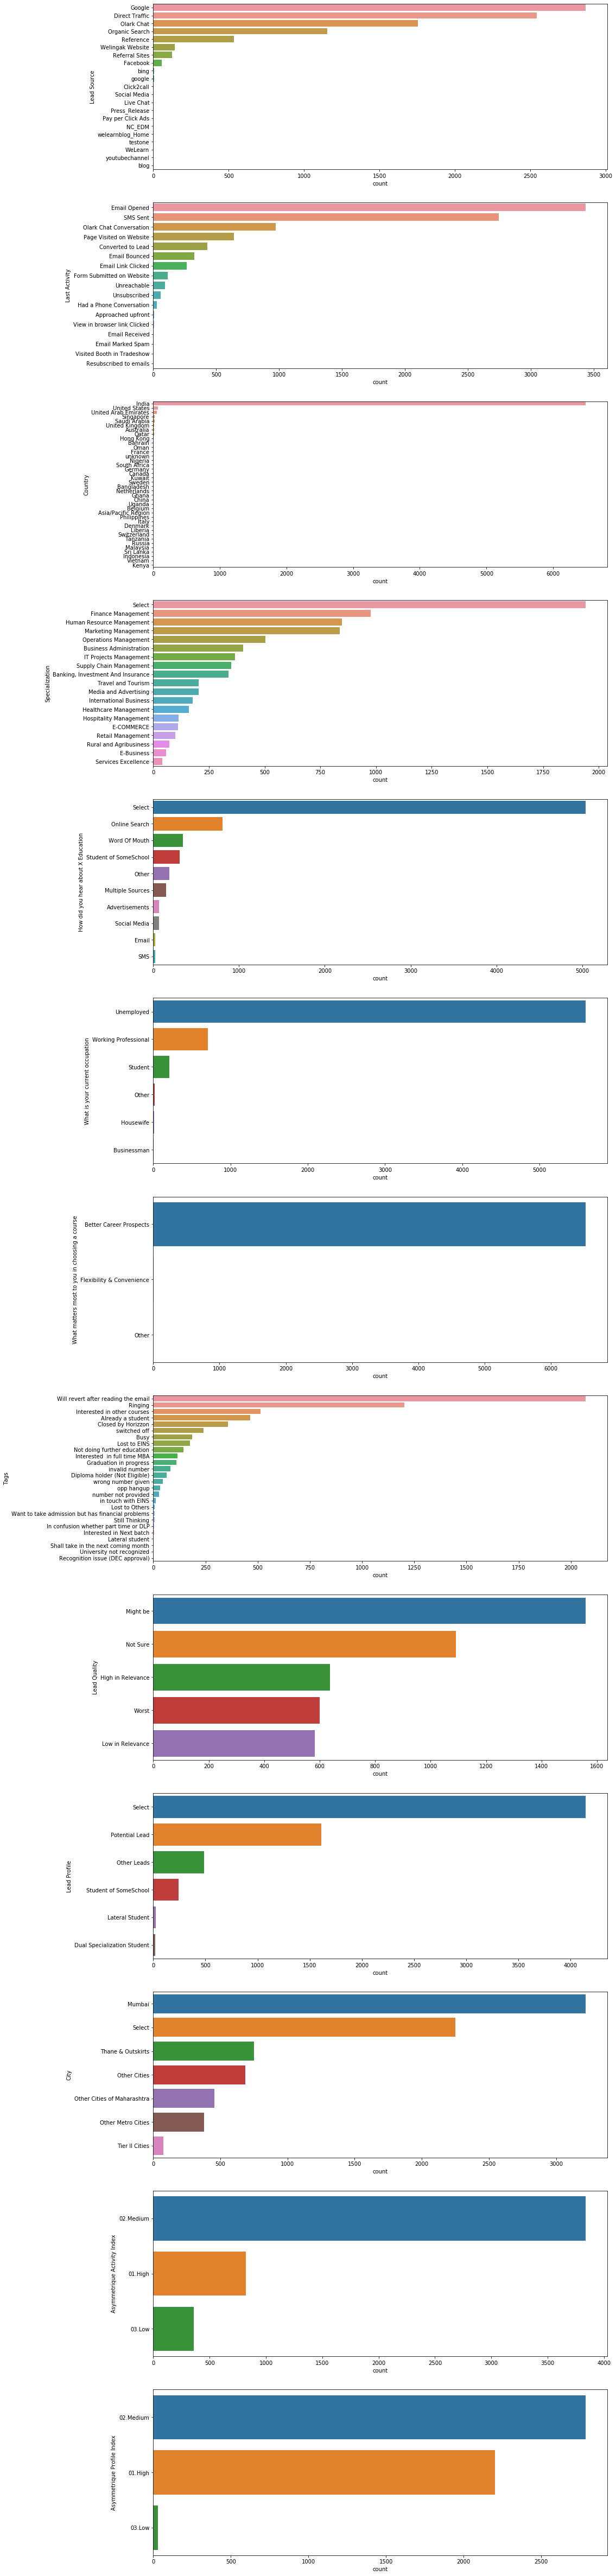

In [445]:
#Graph showing value count for Categorical columns 
j=0
plt.figure(figsize=(15,100))
for col in cat_col:
    #col=ld_scr.columns[i]
    if(ld_scr[col].dtype=='object' and ld_scr[col].isnull().sum()>1):
        plt.subplot(len(cat_col)//2+1,1,j+1)
        j=j+1
        sns.countplot(y = ld_scr[col], order = ld_scr[col].value_counts().index)

In [446]:
#Checking data in categorical columns
for i in cat_col:
#     print('Column: {}'.format(i))
    print(round(ld_scr[i].value_counts()/ld_scr[i].value_counts().sum()*100,2) )
    print('Non-null values: {}%\n'.format(round((len(ld_scr[i])-ld_scr[i].isnull().sum())/len(ld_scr),2)*100))
    

    

Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64
Non-null values: 100.0%

Google               31.16
Direct Traffic       27.63
Olark Chat           19.07
Organic Search       12.54
Reference             5.80
Welingak Website      1.54
Referral Sites        1.36
Facebook              0.60
bing                  0.07
google                0.05
Click2call            0.04
Social Media          0.02
Live Chat             0.02
Press_Release         0.02
Pay per Click Ads     0.01
NC_EDM                0.01
welearnblog_Home      0.01
testone               0.01
WeLearn               0.01
youtubechannel        0.01
blog                  0.01
Name: Lead Source, dtype: float64
Non-null values: 100.0%

No     92.06
Yes     7.94
Name: Do Not Email, dtype: float64
Non-null values: 100.0%

No     99.98
Yes     0.02
Name: Do Not Call, dtype: float64
Non-

#### Observation
- Duplicates in Lead source as google
- Many categorical columns have low variance
- Select present in rows needs to be treated

In [447]:
# ld_scr[ld_scr['Specialization']=='Select'] ['What is your current occupation'].value_counts()

In [448]:
#*** Infer that for Unemployed and Student, Select should be No  Specialization
#Working professional, Other and Businessman should be others

In [449]:
#Renaming google as Google in Lead Source
ld_scr['Lead Source']=ld_scr['Lead Source'].replace('google','Google')
#Renaming lesser occupying categories to others
for i in ld_scr['Lead Source'].unique():
    if(i!='Google' and i!='Direct Traffic' and i!='Olark Chat' and i !='Organic Search'  and i!='Reference' and i !=np.nan):
            ld_scr['Lead Source']=ld_scr['Lead Source'].replace(i,'Others')

In [450]:
#Modification for country
#Replacing unknown as nan
ld_scr['Country']=ld_scr['Country'].replace('unknown',np.nan)
#Other than India and nan as others
for i in ld_scr['Country'].unique():
    if(i!='India' and i !=np.nan):
        ld_scr['Country']=ld_scr['Country'].replace(i,'Others')

In [451]:
# ld_scr[ ld_scr['What is your current occupation'] == 'Unemployed']['Specialization'].replace('Select','No Specialization')

### Replacing 'Select' in columns
- Replace 'Select'  in Specialization, Lead Profile, City, How did you hear about X Education
- Since there is no Other option for Specialization, replace the same with Others
- Since Lead Profile has Other Leads and City has Other City, How did you hear about X Education has others imputing the same with nan values

In [452]:
#****Since there is no Other option for Specialization, replace the same with Others
ld_scr['Specialization']=ld_scr['Specialization'].replace('Select','Others')

# For other columns replacing with nan values
ld_scr['Lead Profile']=ld_scr['Lead Profile'].replace('Select',np.nan)
ld_scr['City']=ld_scr['City'].replace('Select',np.nan)
ld_scr['How did you hear about X Education']=ld_scr['How did you hear about X Education'].replace('Select',np.nan)

In [453]:
# Verifying data for columns where 'Select' is replaced
c=['Specialization','Lead Profile','City','How did you hear about X Education']
for i in c:
    print('{}\nNullValue: {}\n'.format(ld_scr[i].value_counts(),ld_scr[i].isnull().sum()))


Others                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64
NullValue: 1438

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual S

### Drop column with 99% or more rows with same data for categorical

In [454]:
#Find columns where 99% rows  of  data is same(i.e, very less variance)
drop_99=[]
for i in ld_scr.columns:
    if(ld_scr[i].dtype=='object'):
        if(i!='Prospect ID' and i!='Lead Number'):
            if(ld_scr[i].value_counts()[0]>0.99*(len(ld_scr[i])-ld_scr[i].isnull().sum())):
                print(i)
                drop_99.append(i)

Do Not Call
What matters most to you in choosing a course
Search
Magazine
Newspaper Article
X Education Forums
Newspaper
Digital Advertisement
Through Recommendations
Receive More Updates About Our Courses
Update me on Supply Chain Content
Get updates on DM Content
I agree to pay the amount through cheque


In [455]:
#Drop  columns with same data for 99% of rows
ld_scr = ld_scr.drop(drop_99, axis=1)

### Analyzing null values in columns

In [456]:
round(ld_scr.isnull().sum()/len(ld_scr),2)*100

Prospect ID                                0.0
Lead Number                                0.0
Lead Origin                                0.0
Lead Source                                0.0
Do Not Email                               0.0
Converted                                  0.0
TotalVisits                                1.0
Total Time Spent on Website                0.0
Page Views Per Visit                       1.0
Last Activity                              1.0
Country                                    0.0
Specialization                            16.0
How did you hear about X Education        78.0
What is your current occupation           29.0
Tags                                      36.0
Lead Quality                              52.0
Lead Profile                              74.0
City                                      40.0
Asymmetrique Activity Index               46.0
Asymmetrique Profile Index                46.0
Asymmetrique Activity Score               46.0
Asymmetrique 

In [457]:
# Drop columns with more than or equal to 30% rows with null values
ld_scr=ld_scr.drop(['How did you hear about X Education','Lead Quality','Lead Profile','City',
                    'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Profile Score',
                    'Asymmetrique Activity Score','Tags'],axis=1)


In [458]:
ld_scr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
Prospect ID                               9240 non-null object
Lead Number                               9240 non-null object
Lead Origin                               9240 non-null object
Lead Source                               9240 non-null object
Do Not Email                              9240 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9103 non-null float64
Last Activity                             9137 non-null object
Country                                   9240 non-null object
Specialization                            7802 non-null object
What is your current occupation           6550 non-null object
A free copy of Mastering The Interview    9240 non-null object
Last Notabl

In [459]:
#Getting number of rows with blank cells
test=dict(ld_scr.isnull().sum(axis=1))
count_dict={1:0,2:0,3:0,4:0,5:0,6:0}
for i in test.keys():
    if (test[i])>0:
        count_dict[test[i]]=count_dict[test[i]]+1
        #print(str(i)+","+str(test[i]))
count_dict

{1: 1288, 2: 1440, 3: 103, 4: 7, 5: 0, 6: 0}

In [460]:
### Dropping rows with 3 or more columns blank
for i in test.keys():
    if (test[i])>=3:
        ld_scr=ld_scr.drop(i)
   

In [461]:

ld_scr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9130 entries, 0 to 9239
Data columns (total 15 columns):
Prospect ID                               9130 non-null object
Lead Number                               9130 non-null object
Lead Origin                               9130 non-null object
Lead Source                               9130 non-null object
Do Not Email                              9130 non-null object
Converted                                 9130 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9130 non-null int64
Page Views Per Visit                      9103 non-null float64
Last Activity                             9130 non-null object
Country                                   9130 non-null object
Specialization                            7699 non-null object
What is your current occupation           6447 non-null object
A free copy of Mastering The Interview    9130 non-null object
Last Notabl

### Imputation of null values for numerical columns

In [462]:
ld_scr.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9130.000000,9103.000000,9130.000000,9103.000000
mean,0.381161,3.445238,482.553998,2.362820
std,0.485699,4.854853,545.684963,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.250000,1.000000
50%,0.000000,3.000000,245.500000,2.000000
75%,1.000000,5.000000,921.750000,3.000000
90%,1.000000,7.000000,1374.100000,5.000000
95%,1.000000,10.000000,1557.000000,6.000000
99%,1.000000,17.000000,1839.710000,9.000000


In [463]:
#imputing with median for numerical  columns with null values
ld_scr['TotalVisits']=ld_scr['TotalVisits'].fillna(ld_scr['TotalVisits'].median())
ld_scr['Page Views Per Visit']=ld_scr['Page Views Per Visit'].fillna(ld_scr['Page Views Per Visit'].median())
#check   null count again
ld_scr.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Country                                      0
Specialization                            1431
What is your current occupation           2683
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

### Imputation of null values of categorical columns

In [464]:
for i in range(0,len(ld_scr.columns)):
    col=ld_scr.columns[i]
    if(ld_scr[col].dtype=='object' and ld_scr[col].isnull().sum()>1):
        print(col)

Specialization
What is your current occupation


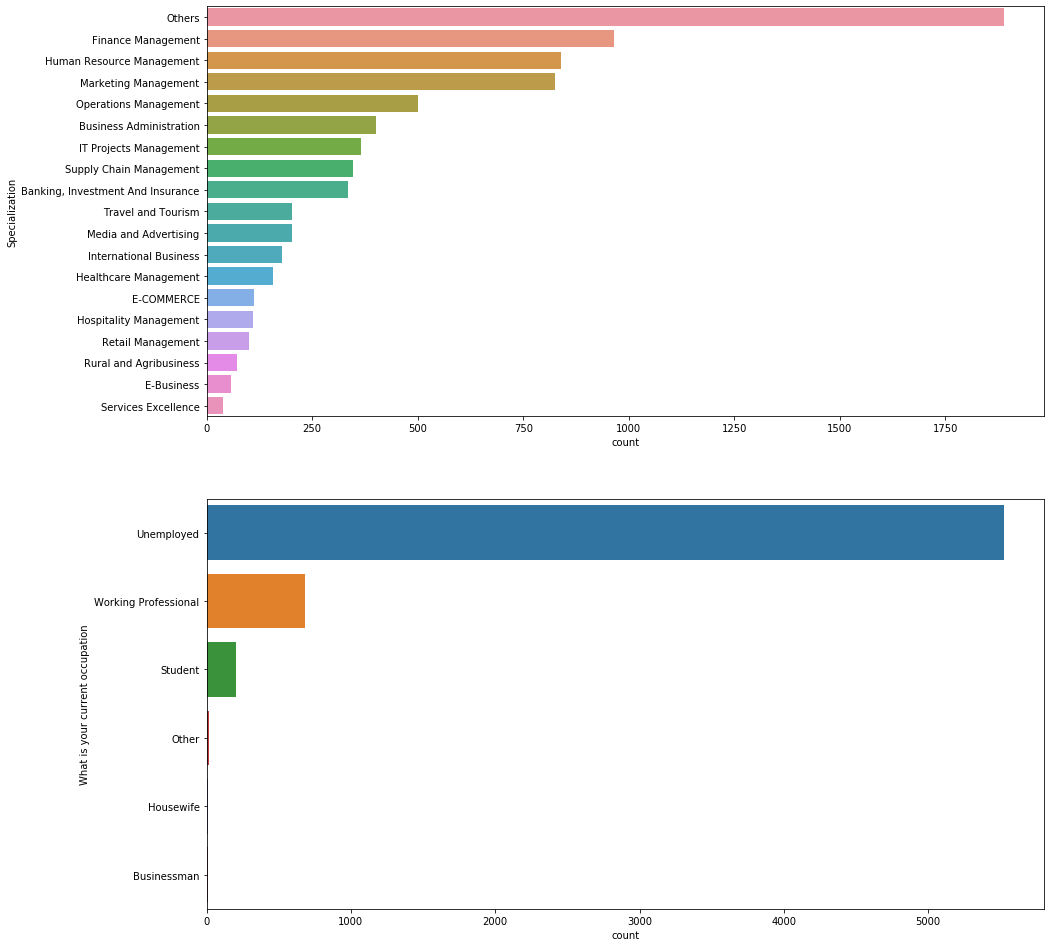

In [465]:
#Graph showing value count for Categorical columns with null  values
j=0
plt.figure(figsize=(15,80))
for i in range(0,len(ld_scr.columns)):
    col=ld_scr.columns[i]
    if(ld_scr[col].dtype=='object' and ld_scr[col].isnull().sum()>1):
        plt.subplot(9,1,j+1)
        j=j+1
        sns.countplot(y = ld_scr[col], order = ld_scr[col].value_counts().index)

In [466]:
# ld_scr[ld_scr['What is your current occupation'].isnull()] ['Specialization'].value_counts()

In [467]:
# ld_scr[ld_scr['Specialization'].isnull()] ['What is your current occupation'].value_counts()

In [468]:
#imputation with highest occurring value for categorical columns with null values
fill_dict={'Lead Source':'Google','Specialization':'Others',
           'What is your current occupation':'Unemployed',
           'Last Activity':'Email Opened','Country':'India'}
for i in fill_dict.keys():
    ld_scr[i]=ld_scr[i].fillna(fill_dict[i])


In [469]:
#Verifying null value count for columns
ld_scr.isnull().sum()/len(ld_scr)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [470]:
# #Find columns where 99% data is same(i.e, very less variance)
# drop_99=[]
# for i in ld_scr.columns:
#     if(ld_scr[i].dtype=='object' and  i!='Prospect ID' and i!='Lead Number'):  
#         if(ld_scr[i].value_counts()[0]>0.99*(len(ld_scr[i])-ld_scr[i].isnull().sum())):
#             print(ld_scr[i].value_counts())
#             drop_99.append(i)

In [471]:
# #drop above columns
# ld_scr=ld_scr.drop(drop_99,axis=1)

In [472]:
# drop_99

### Outlier Treatment for numerical  columns

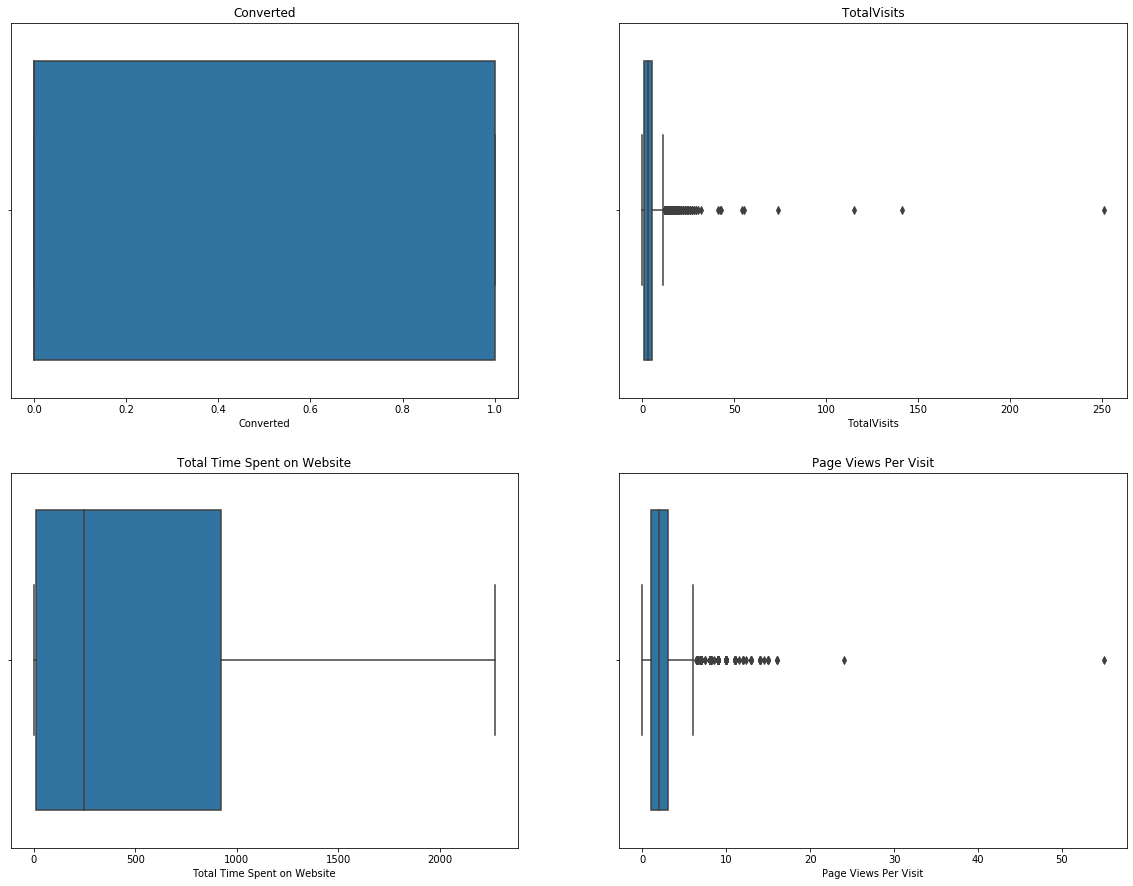

In [473]:
#Checking for outliers
plt.figure(figsize=(20,40))
j=0
for i in ld_scr.columns:
    if(ld_scr[i].dtype=='int64' or ld_scr[i].dtype=='float64' ):
        plt.subplot(5,2,j+1)
        j=j+1
        sns.boxplot(ld_scr[i])
        plt.title(i)

In [474]:
# ***** Total visits per page cap to less than 50,  Pages per visit to less than 20
c='TotalVisits'
ld_scr[c]=ld_scr[c].apply(lambda x: ld_scr[ld_scr[c]<40][c].max() if x>40 else x )
c='Page Views Per Visit'
ld_scr[c]=ld_scr[c].apply(lambda x: ld_scr[ld_scr[c]<20][c].max() if x>20 else x )

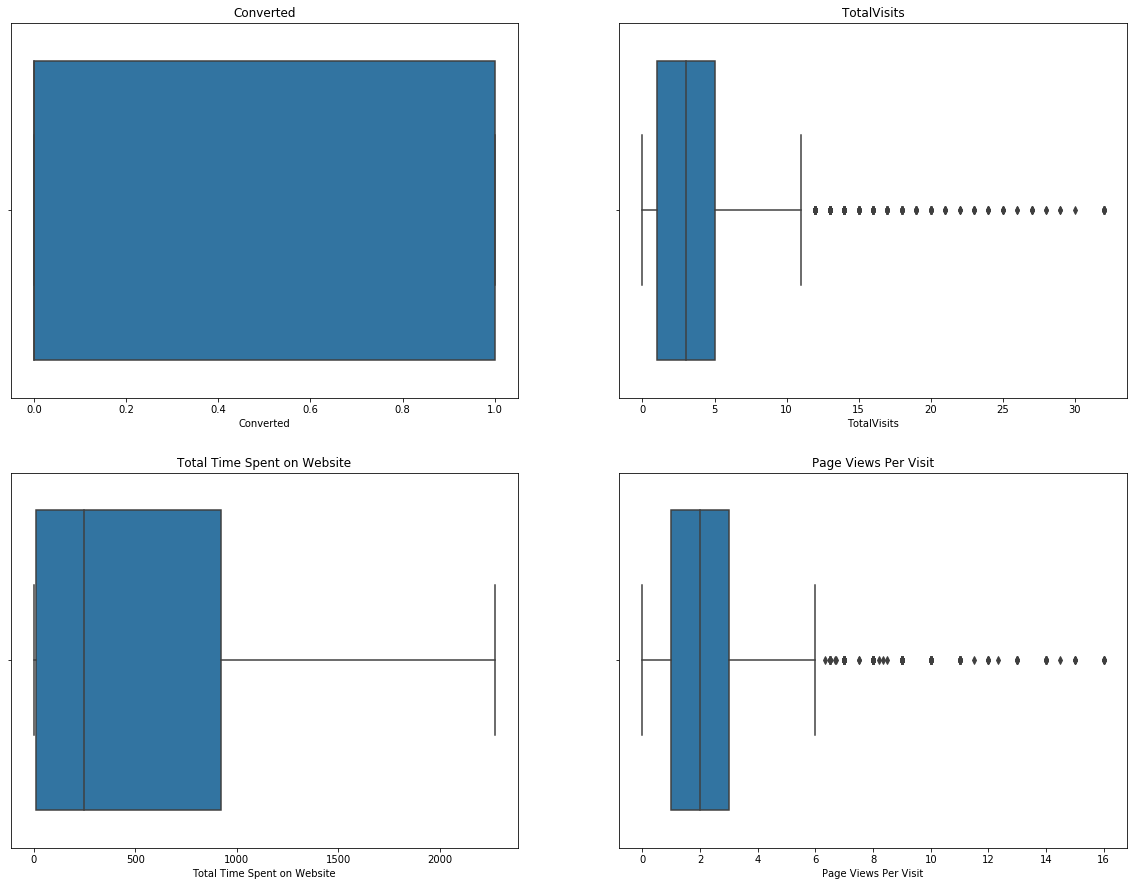

In [475]:
#Verifying after capping
plt.figure(figsize=(20,40))
j=0
for i in ld_scr.columns:
    if(ld_scr[i].dtype=='int64' or ld_scr[i].dtype=='float64' ):
        plt.subplot(5,2,j+1)
        j=j+1
        sns.boxplot(ld_scr[i])
        plt.title(i)

In [476]:
#Backup before dummy
ld_scr_mod=ld_scr.copy()
ld_scr_mod.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Others,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,No,Modified


# Creating dummy columns

In [477]:
#Replace Yes/No columns with 1/0
ld_scr_mod['Do Not Email']=ld_scr_mod['Do Not Email'].apply(lambda x:1 if x=='Yes' else 0)
ld_scr_mod['A free copy of Mastering The Interview']=ld_scr_mod['A free copy of Mastering The Interview'].apply(lambda x:1 if x=='Yes' else 0)
ld_scr_mod.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Others,Unemployed,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,0,Modified


In [478]:
for i in ld_scr_mod.columns:
    if(i!='Prospect ID' and i !='Lead Number' and ld_scr_mod[i].dtype=='object'):
        print(ld_scr_mod[i].value_counts())

Landing Page Submission    4886
API                        3579
Lead Add Form               631
Lead Import                  33
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google            2873
Direct Traffic    2543
Olark Chat        1754
Organic Search    1154
Reference          462
Others             344
Name: Lead Source, dtype: int64
Email Opened                    3437
SMS Sent                        2739
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Las

In [479]:
#ld_scr.query('Country=="unknown"').count()

In [480]:
ld_scr_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9130 entries, 0 to 9239
Data columns (total 15 columns):
Prospect ID                               9130 non-null object
Lead Number                               9130 non-null object
Lead Origin                               9130 non-null object
Lead Source                               9130 non-null object
Do Not Email                              9130 non-null int64
Converted                                 9130 non-null int64
TotalVisits                               9130 non-null float64
Total Time Spent on Website               9130 non-null int64
Page Views Per Visit                      9130 non-null float64
Last Activity                             9130 non-null object
Country                                   9130 non-null object
Specialization                            9130 non-null object
What is your current occupation           9130 non-null object
A free copy of Mastering The Interview    9130 non-null int64
Last Notable 

In [481]:
# Creating dummy variables for the column 'Country'

ml = pd.get_dummies(ld_scr_mod['Country'], prefix='Country')

# #Find columns where 95% rows  of  data is same(i.e, very less variance)
# drop_99=[]
# for i in ml.columns:
#     if(ml[i].value_counts()[0]>0.95*(len(ml[i]))):
#         print(i)
#         drop_99.append(i)
   
# #Dropping Low variance column which has near to 95 % data same 
# ml1=ml.drop(drop_99,axis=1)
#Adding the results to the master dataframe
ld_scr_mod = pd.concat([ld_scr_mod,ml], axis=1)
#drop  the original column
ld_scr_mod=ld_scr_mod.drop('Country',axis=1)


In [482]:
ld_scr_mod.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Country_India,Country_Others
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0,Modified,0,1
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0,Email Opened,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened,1,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0,Modified,1,0


In [483]:
# Creating dummy variables 
dum_col=['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation',
         'Last Notable Activity']
#ld_scr_mod=ld_scr.copy()
for i in dum_col:
    nal = pd.get_dummies(ld_scr_mod[i], prefix=i)
    ld_scr_mod = pd.concat([ld_scr_mod,nal], axis=1)
    ld_scr_mod=ld_scr_mod.drop(i,axis=1)
    

In [484]:
#Backup before Drop
ld_scr_mod_orig=ld_scr_mod.copy()

In [485]:
ld_scr_mod.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Country_India,Country_Others,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,305,1.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [486]:
#Find columns where 98% data is same(i.e, very less variance)
drop_98=[]
for i in ld_scr_mod.columns:
    if(ld_scr_mod[i].dtype!='object'):
        print('{} : {}'.format(i,100*ld_scr_mod[i].value_counts()[0]/(len(ld_scr_mod[i])-ld_scr_mod[i].isnull().sum())))
        if(ld_scr_mod[i].value_counts()[0]>0.98*(len(ld_scr_mod[i])-ld_scr_mod[i].isnull().sum())):
            drop_98.append(i)

Do Not Email : 91.960569550931
Converted : 61.88389923329682
TotalVisits : 23.97590361445783
Total Time Spent on Website : 24.0197152245345
Page Views Per Visit : 23.97590361445783
A free copy of Mastering The Interview : 68.36801752464403
Country_India : 28.893756845564074
Country_Others : 71.10624315443593
Lead Origin_API : 60.79956188389923
Lead Origin_Landing Page Submission : 46.48411829134721
Lead Origin_Lead Add Form : 93.08871851040526
Lead Origin_Lead Import : 99.63855421686748
Lead Origin_Quick Add Form : 99.98904709748084
Lead Source_Direct Traffic : 72.14676889375684
Lead Source_Google : 68.53231106243155
Lead Source_Olark Chat : 80.78860898138007
Lead Source_Organic Search : 87.36035049288061
Lead Source_Others : 96.23220153340635
Lead Source_Reference : 94.93975903614458
Last Activity_Approached upfront : 99.90142387732749
Last Activity_Converted to Lead : 95.31215772179628
Last Activity_Email Bounced : 96.42935377875136
Last Activity_Email Link Clicked : 97.0755750273822

In [487]:
drop_98

['Lead Origin_Lead Import',
 'Lead Origin_Quick Add Form',
 'Last Activity_Approached upfront',
 'Last Activity_Email Marked Spam',
 'Last Activity_Email Received',
 'Last Activity_Form Submitted on Website',
 'Last Activity_Had a Phone Conversation',
 'Last Activity_Resubscribed to emails',
 'Last Activity_Unreachable',
 'Last Activity_Unsubscribed',
 'Last Activity_View in browser link Clicked',
 'Last Activity_Visited Booth in Tradeshow',
 'Specialization_E-Business',
 'Specialization_E-COMMERCE',
 'Specialization_Healthcare Management',
 'Specialization_Hospitality Management',
 'Specialization_International Business',
 'Specialization_Retail Management',
 'Specialization_Rural and Agribusiness',
 'Specialization_Services Excellence',
 'What is your current occupation_Businessman',
 'What is your current occupation_Housewife',
 'What is your current occupation_Other',
 'Last Notable Activity_Approached upfront',
 'Last Notable Activity_Email Bounced',
 'Last Notable Activity_Email 

In [488]:
ld_scr_mod=ld_scr_mod.drop(drop_98,axis=1)

In [489]:
ld_scr_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9130 entries, 0 to 9239
Data columns (total 45 columns):
Prospect ID                                             9130 non-null object
Lead Number                                             9130 non-null object
Do Not Email                                            9130 non-null int64
Converted                                               9130 non-null int64
TotalVisits                                             9130 non-null float64
Total Time Spent on Website                             9130 non-null int64
Page Views Per Visit                                    9130 non-null float64
A free copy of Mastering The Interview                  9130 non-null int64
Country_India                                           9130 non-null uint8
Country_Others                                          9130 non-null uint8
Lead Origin_API                                         9130 non-null uint8
Lead Origin_Landing Page Submission                

In [490]:
# # Stored the unique id to separate variables before scaling

Prospect_ID = ld_scr_mod.pop("Prospect ID")
Lead_Number = ld_scr_mod.pop("Lead Number")

# Test-Train Split

In [491]:
y=ld_scr_mod.pop('Converted')
X = ld_scr_mod
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Country_India,Country_Others,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,5.0,674,2.5,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0


In [492]:

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [493]:
#splitting Dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [494]:
y_train[:10]

4108    0
3126    0
1991    1
6946    1
3577    0
1663    1
1225    0
1423    1
7185    0
5618    0
Name: Converted, dtype: int64

In [495]:
#Scaling required variables
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
#ld_scr_scaled['Converted'].sum()/len(ld_scr['Converted']) * 100

In [496]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Country_India,Country_Others,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
4108,0,-0.121881,-0.847588,0.294376,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3126,0,-0.962165,-0.887789,-1.139322,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1991,0,1.838780,1.833114,-0.183523,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
6946,0,1.838780,1.566323,0.055426,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3577,0,1.558686,0.166583,3.161770,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0


## Bi-variable Correlation

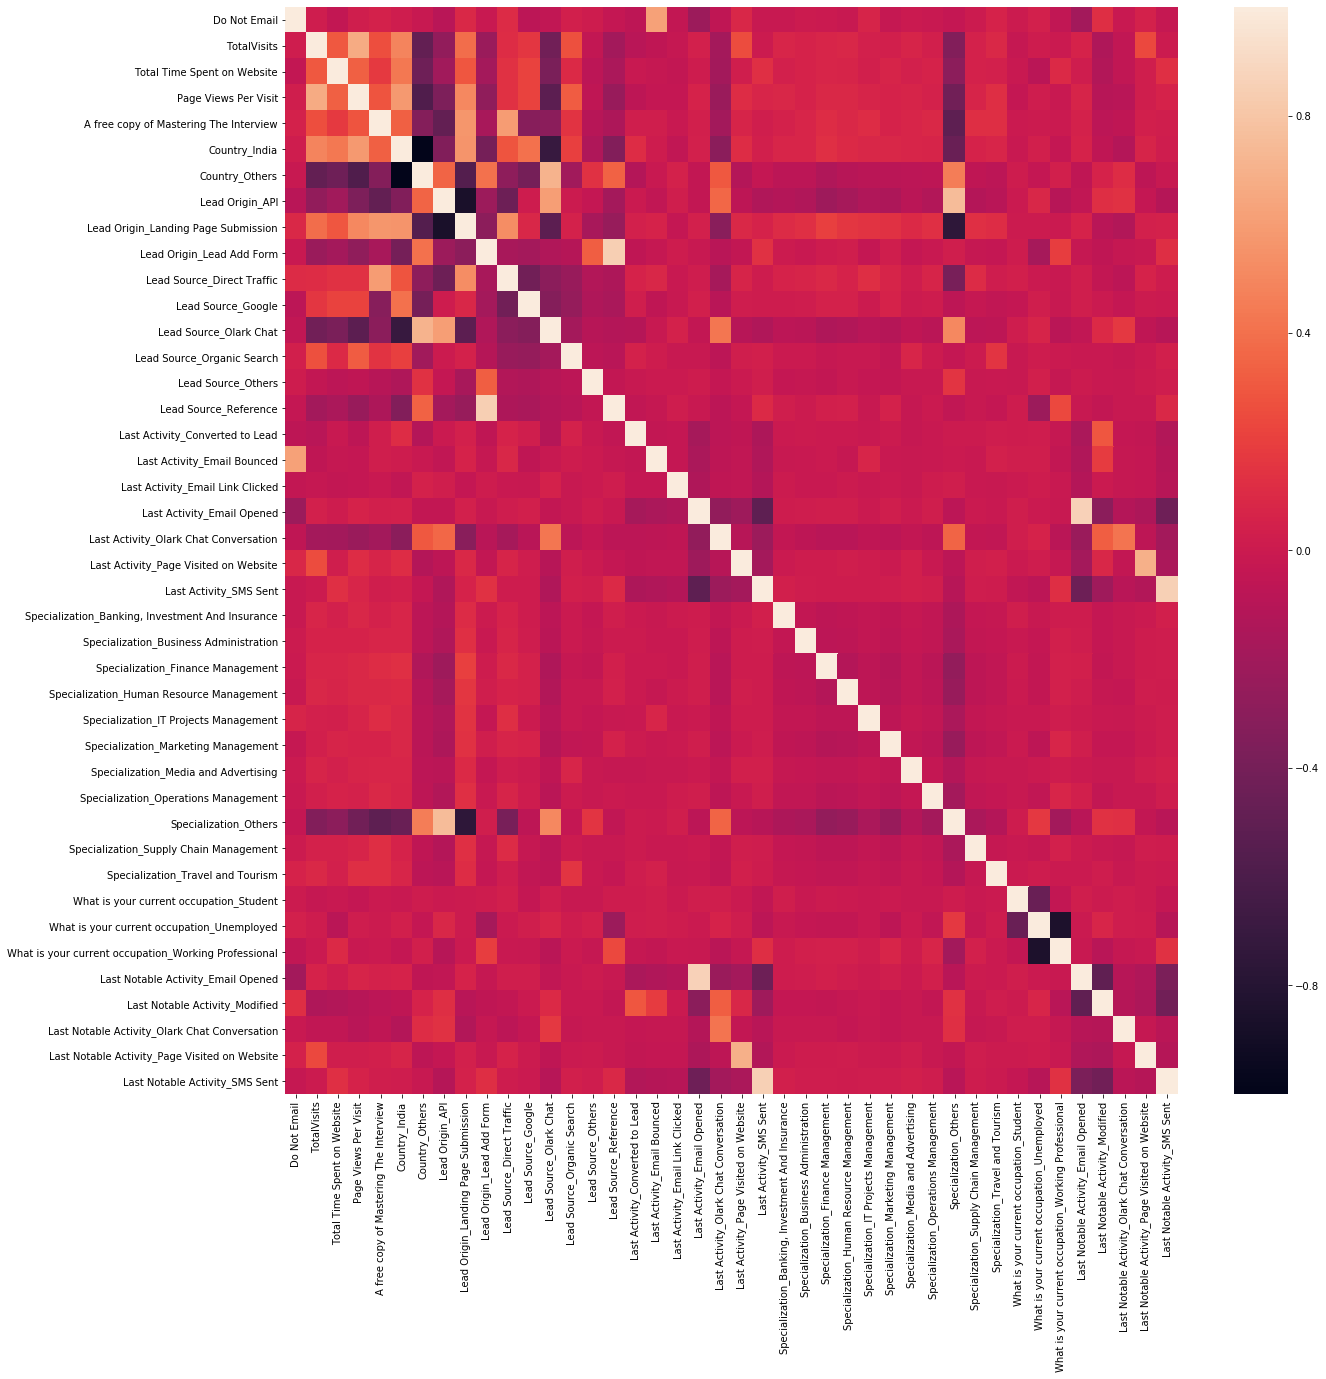

In [497]:
#Checking correlated
plt.figure(figsize=(20,20))
sns.heatmap(ld_scr_mod.corr())


In [498]:
#Dropping highly correlated columns
X_test=X_test.drop(['Lead Origin_Landing Page Submission','Lead Source_Reference','Last Activity_Email Opened',
                    'Last Activity_SMS Sent','Country_Others', 
                   'What is your current occupation_Working Professional'
                   ],axis=1)
X_train=X_train.drop(['Lead Origin_Landing Page Submission','Lead Source_Reference','Last Activity_Email Opened',
                    'Last Activity_SMS Sent','Country_Others',
                   'What is your current occupation_Working Professional'
                   ],axis=1)

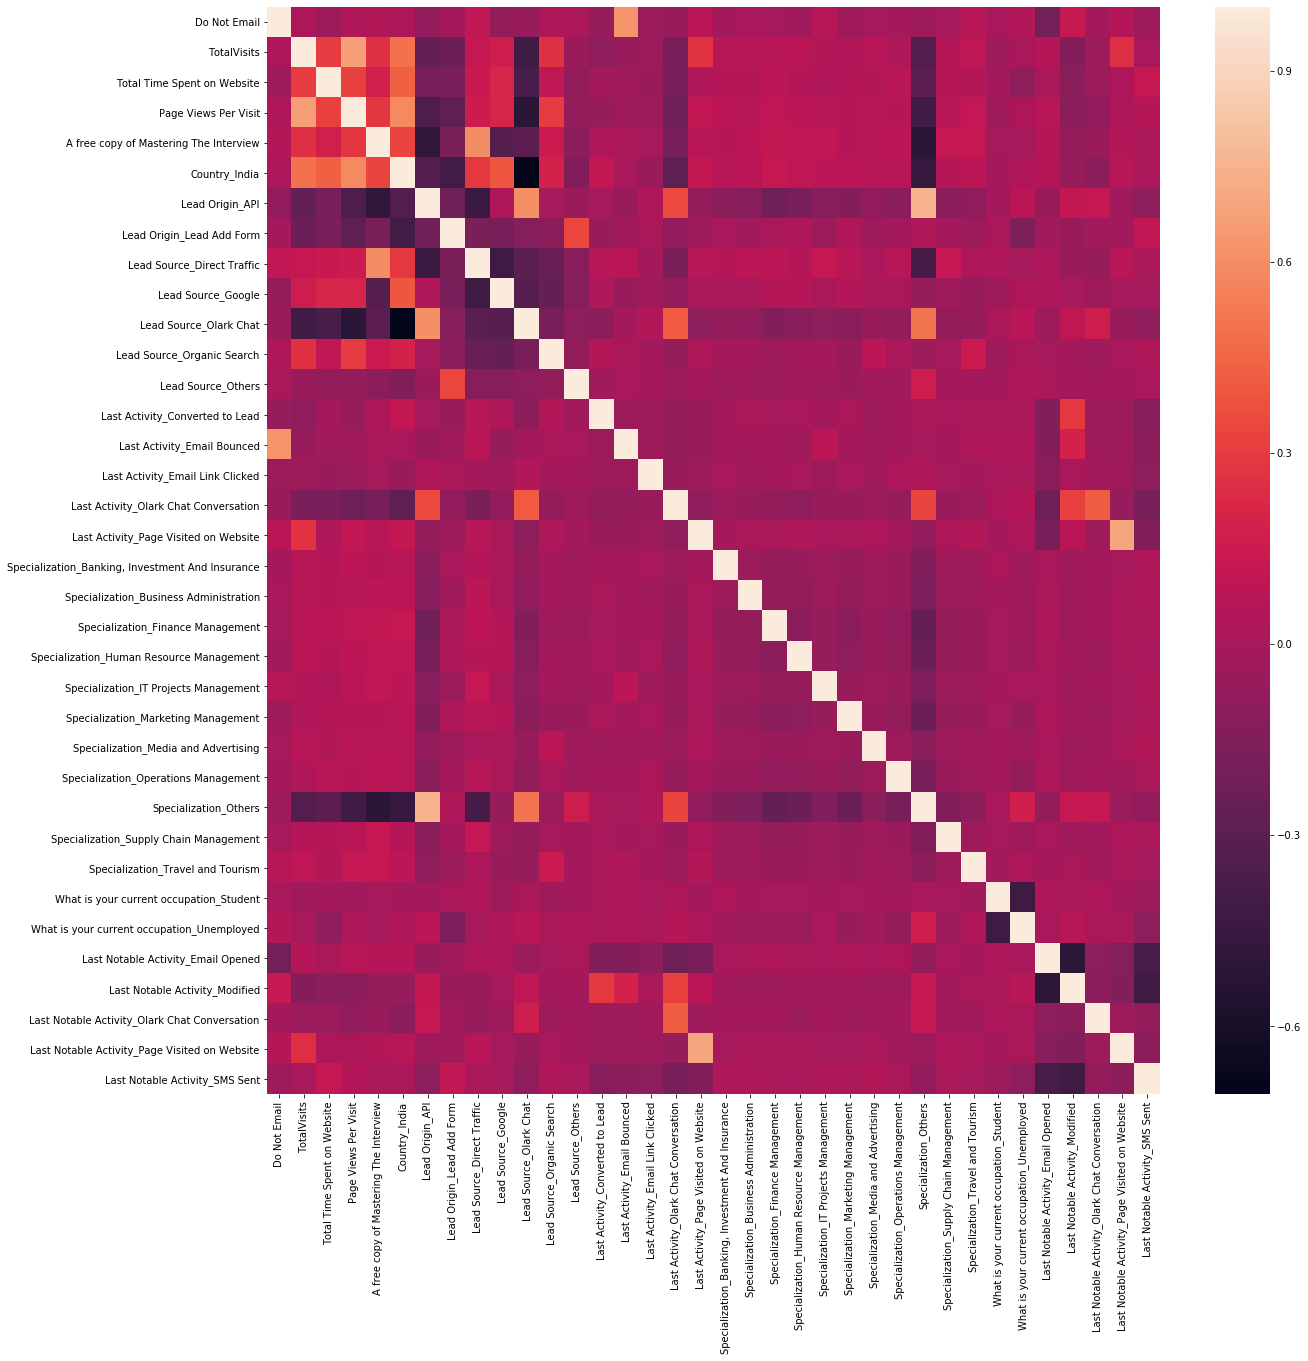

In [499]:
#Re-checking correlation
plt.figure(figsize=(20,20))
sns.heatmap(X_train.corr())


# Model Building

In [500]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6391
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           36
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2618.8
Date:                Mon, 02 Mar 2020   Deviance:                       5237.6
Time:                        20:23:26   Pearson chi2:                 6.78e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                1.3835      0.635      2.180      0.029       0.140       2.627
Do Not Email                                        -1.3111      0.190     -6.885      0.000      -1.684      -0.938
TotalVisits                                          0.2794      0.049      5.722      0.000       0.184       0.375
Total Time Spent on Website                          1.0958      0.041     26.940      0.000       1.016       1.176
Page Views Per Visit                                -0.3154      0.054     -5.795      0.000      -0.422      -0.209
A free copy of Mastering The Interview              -0.0421      0.109     -0.388      0.698      -0.255       0.171
Country_India                                       -0.3532      0.160     -2.212      0.027      -0.666      -0.040
Lead Origin_API                                      0.8185      0.136      6.008      0.000       0.551       1.086
Lead Origin_Lead Add Form                            4.9657      0.523      9.495      0.000       3.941       5.991
Lead Source_Direct Traffic                           0.8917      0.554      1.609      0.108      -0.194       1.978
Lead Source_Google                                   1.3042      0.548      2.379      0.017       0.230       2.379
Lead Source_Olark Chat                               1.9436      0.563      3.453      0.001       0.840       3.047
Lead Source_Organic Search                           1.1612      0.555      2.092      0.036       0.073       2.249
Lead Source_Others                                   1.6201      0.486      3.331      0.001       0.667       2.573
Last Activity_Converted to Lead                     -1.0418      0.224     -4.654      0.000      -1.481      -0.603
Last Activity_Email Bounced                         -1.0957      0.356     -3.079      0.002      -1.793      -0.398
Last Activity_Email Link Clicked                    -1.0180      0.276     -3.687      0.000      -1.559      -0.477
Last Activity_Olark Chat Conversation               -1.4993      0.197     -7.622      0.000      -1.885      -1.114
Last Activity_Page Visited on Website               -0.6831      0.226     -3.017      0.003      -1.127      -0.239
Specialization_Banking, Investment And Insurance     0.4580      0.210      2.181      0.029       0.046       0.869
Specialization_Business Administration               0.3216      0.195      1.653      0.098      -0.060       0.703
Specialization_Finance Management                    0.2057      0.156      1.320      0.187      -0.100       0.511
Specialization_Human Resource Management             0.1281      0.160      0.801      0.423      -0.185       0.441
Specialization_IT Projects Management    

# Selection Using RFE

In [501]:
logregrn = LogisticRegression()

In [502]:
rfe = RFE(logregrn, 9) 
rfe = rfe.fit(X_train, y_train)

In [503]:
rfe.support_

array([ True, False,  True, False, False, False, False,  True, False,
       False,  True, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False,  True])

In [504]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 17),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 16),
 ('A free copy of Mastering The Interview', False, 28),
 ('Country_India', False, 11),
 ('Lead Origin_API', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Direct Traffic', False, 27),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 15),
 ('Lead Source_Others', False, 5),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link Clicked', False, 7),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 6),
 ('Specialization_Banking, Investment And Insurance', False, 13),
 ('Specialization_Business Administration', False, 18),
 ('Specialization_Finance Management', False, 20),
 ('Specialization_Human Resource Management', False, 23),
 ('Specialization_IT Projec

In [505]:
col = X_train.columns[rfe.support_]

In [506]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Country_India',
       'Lead Origin_API', 'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Page Visited on Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management', 'Specialization_Others',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat 

##  Model 1 with RFE columns

In [507]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6391
Model:                            GLM   Df Residuals:                     6381
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2724.8
Date:                Mon, 02 Mar 2020   Deviance:                       5449.6
Time:                        20:23:27   Pearson chi2:                 6.92e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.3766      0.175      7.873      0.000       1.034       1.719
Do Not Email                                  -1.4876      0.154     -9.648      0.000      -1.790      -1.185
Total Time Spent on Website                    1.1070      0.039     28.065      0.000       1.030       1.184
Lead Origin_Lead Add Form                      4.1411      0.199     20.773      0.000       3.750       4.532
Lead Source_Olark Chat                         1.1959      0.101     11.796      0.000       0.997       1.395
Last Activity_Converted to Lead               -1.1061      0.208     -5.324      0.000      -1.513      -0.699
Last Activity_Olark Chat Conversation         -1.3900      0.155     -8.986      0.000      -1.693      -1.087
What is your current occupation_Student       -2.4796      0.294     -8.434      0.000      -3.056      -1.903
What is your current occupation_Unemployed    -2.7190      0.176    -15.422      0.000      -3.065      -2.373
Last Notable Activity_SMS Sent                 1.5144      0.079     19.207      0.000       1.360       1.669
==============================================================================================================
"""

## VIF

In [508]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,What is your current occupation_Unemployed,1.88
3,Lead Source_Olark Chat,1.72
5,Last Activity_Olark Chat Conversation,1.39
8,Last Notable Activity_SMS Sent,1.34
1,Total Time Spent on Website,1.24
2,Lead Origin_Lead Add Form,1.15
0,Do Not Email,1.11
4,Last Activity_Converted to Lead,1.08
6,What is your current occupation_Student,1.02


In [509]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4108    0.092731
3126    0.244288
1991    0.665256
6946    0.596636
3577    0.239022
1663    0.860070
1225    0.074513
1423    0.597609
7185    0.070188
5618    0.089548
dtype: float64

In [510]:
#Re-shape
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09273107, 0.24428782, 0.66525551, 0.59663551, 0.23902238,
       0.86007003, 0.07451317, 0.59760878, 0.07018791, 0.08954773])

#### Creating a dataframe with the Converted  and the predicted probabilities

In [511]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Lead_Number'] = y_train.index
y_train_pred_final.head()

,Converted,Convert_Prob,Lead_Number
0,0,0.092731,4108
1,0,0.244288,3126
2,1,0.665256,1991
3,1,0.596636,6946
4,0,0.239022,3577


In [512]:
y_train.head()

4108    0
3126    0
1991    1
6946    1
3577    0
Name: Converted, dtype: int64

## ROC Curve

In [513]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

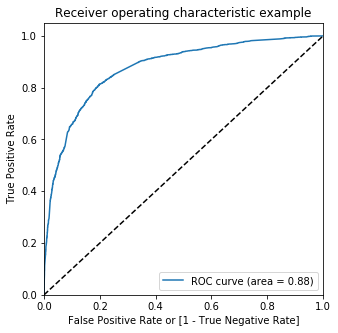

In [514]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_Prob, drop_intermediate = False )

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

In [515]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Lead_Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.092731,4108,1,0,0,0,0,0,0,0,0,0
1,0,0.244288,3126,1,1,1,0,0,0,0,0,0,0
2,1,0.665256,1991,1,1,1,1,1,1,1,0,0,0
3,1,0.596636,6946,1,1,1,1,1,1,0,0,0,0
4,0,0.239022,3577,1,1,1,0,0,0,0,0,0,0


In [516]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383977  1.000000  0.000000
0.1   0.1  0.578783  0.968623  0.335789
0.2   0.2  0.740260  0.908313  0.635509
0.3   0.3  0.797058  0.832111  0.775210
0.4   0.4  0.808794  0.767319  0.834646
0.5   0.5  0.808794  0.689894  0.882906
0.6   0.6  0.790017  0.572535  0.925578
0.7   0.7  0.777343  0.500000  0.950216
0.8   0.8  0.756533  0.413610  0.970282
0.9   0.9  0.701455  0.241646  0.988062


In [517]:
y_train_pred_final[:5]



,Converted,Convert_Prob,Lead_Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.092731,4108,1,0,0,0,0,0,0,0,0,0
1,0,0.244288,3126,1,1,1,0,0,0,0,0,0,0
2,1,0.665256,1991,1,1,1,1,1,1,1,0,0,0
3,1,0.596636,6946,1,1,1,1,1,1,0,0,0,0
4,0,0.239022,3577,1,1,1,0,0,0,0,0,0,0


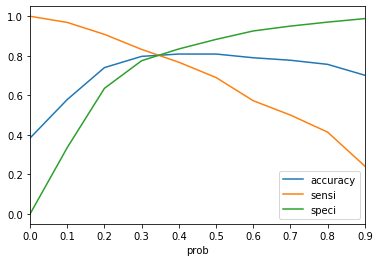

In [518]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [519]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Convert_Prob,Lead_Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.092731,4108,1,0,0,0,0,0,0,0,0,0,0
1,0,0.244288,3126,1,1,1,0,0,0,0,0,0,0,0
2,1,0.665256,1991,1,1,1,1,1,1,1,0,0,0,1
3,1,0.596636,6946,1,1,1,1,1,1,0,0,0,0,1
4,0,0.239022,3577,1,1,1,0,0,0,0,0,0,0,0


In [520]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.767318663406683

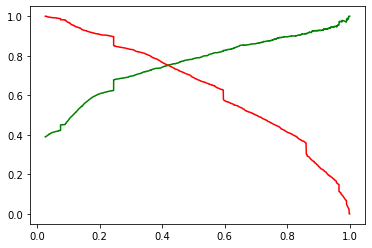

In [521]:
#Precion and recall tradeoff
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")

In [522]:
##### Creating new column 'predicted Lead' with 1 if Churn_Prob > 0.7 else 0
y_train_pred_final['pred_conv'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head(10)

,Converted,Convert_Prob,Lead_Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,pred_conv
0,0,0.092731,4108,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0.244288,3126,1,1,1,0,0,0,0,0,0,0,0,0
2,1,0.665256,1991,1,1,1,1,1,1,1,0,0,0,1,1
3,1,0.596636,6946,1,1,1,1,1,1,0,0,0,0,1,1
4,0,0.239022,3577,1,1,1,0,0,0,0,0,0,0,0,0
5,1,0.860070,1663,1,1,1,1,1,1,1,1,1,0,1,1
6,0,0.074513,1225,1,0,0,0,0,0,0,0,0,0,0,0
7,1,0.597609,1423,1,1,1,1,1,1,0,0,0,0,1,1
8,0,0.070188,7185,1,0,0,0,0,0,0,0,0,0,0,0
9,0,0.089548,5618,1,0,0,0,0,0,0,0,0,0,0,0


## Confusion Matrix

In [523]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.pred_conv )
print(confusion)

[[3286  651]
 [ 571 1883]]


In [524]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: \t\t\t{0:.2f}'.format( TP / float(TP+FN)))
# Let us calculate specificity
print('Specificity: \t\t\t{0:.2f}'.format(TN / float(TN+FP)))
# Calculate false postive rate - predicting  when convertion rate is fina;
print('False Positive Rate: \t\t{0:.2f}'.format( FP/ float(TN+FP)))
# positive predictive value 
print ('Positive Predictive Value: \t{0:.2f}'.format(TP / float(TP+FP)))
# Negative predictive value
print ('Negative Predictive Value: \t{0:.2f}'.format(TN / float(TN+ FN)))
#Precision Score
print('Precision Score:\t\t{0:.2f}'.format(precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)))
#Recall score
print('Recall Score:\t\t\t{0:.2f}'.format(recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)))

Sensitivity: 			0.77
Specificity: 			0.83
False Positive Rate: 		0.17
Positive Predictive Value: 	0.74
Negative Predictive Value: 	0.85
Precision Score:		0.74
Recall Score:			0.77


In [525]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.pred_conv))



0.8087936160225316


## Predicting on Test Set

In [526]:
X_test1 = X_test[col]
X_test1.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_SMS Sent
4112,0,-0.876425,0,1,0,0,0,0,1
3642,0,1.845729,0,0,0,0,0,1,0
4577,0,1.004168,0,0,0,0,0,0,1
7073,0,-0.618051,0,0,0,0,0,1,0
2940,0,1.579973,0,0,0,0,0,1,1


In [527]:
#adding constant and predicting
X_test_sm = sm.add_constant(X_test1)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4112    0.957575
3642    0.668358
4577    0.982059
7073    0.116434
2940    0.872245
4773    0.997675
529     0.439020
6438    0.887738
8548    0.310830
6560    0.526666
dtype: float64

In [528]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
4112,0.957575
3642,0.668358
4577,0.982059
7073,0.116434
2940,0.872245


In [529]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting CustID to index
y_test_df['Lead_Number'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [530]:
# Concatenating y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()


,Converted,Lead_Number,0
0,1,4112,0.957575
1,1,3642,0.668358
2,1,4577,0.982059
3,0,7073,0.116434
4,1,2940,0.872245


In [531]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Lead_Number','Converted','Convert_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()


,Lead_Number,Converted,Convert_Prob
0,4112,1,0.957575
1,3642,1,0.668358
2,4577,1,0.982059
3,7073,0,0.116434
4,2940,1,0.872245


In [532]:
#converting probability to predicted Conversion
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_final.head()

,Lead_Number,Converted,Convert_Prob,final_predicted
0,4112,1,0.957575,1
1,3642,1,0.668358,1
2,4577,1,0.982059,1
3,7073,0,0.116434,0
4,2940,1,0.872245,1


In [533]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8116100766703176

In [534]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

# Model 2

In [535]:
#Checking if TotalVisits, Page Views Per Visit or A free copy of Mastering The Interview
#play any role in lead score probability
col2=['Last Activity_Converted to Lead', 'Total Time Spent on Website','Do Not Email',
      'A free copy of Mastering The Interview',
 'Lead Origin_Lead Add Form','TotalVisits', 'Page Views Per Visit',
      'What is your current occupation_Student','What is your current occupation_Unemployed']

In [536]:
#fitting the model
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6391
Model:                            GLM   Df Residuals:                     6381
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3022.9
Date:                Mon, 02 Mar 2020   Deviance:                       6045.9
Time:                        20:23:31   Pearson chi2:                 6.92e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          2.0451      0.170     12.031      0.000       1.712       2.378
Last Activity_Converted to Lead               -1.6183      0.204     -7.922      0.000      -2.019      -1.218
Total Time Spent on Website                    1.0217      0.035     29.234      0.000       0.953       1.090
Do Not Email                                  -1.4372      0.145     -9.889      0.000      -1.722      -1.152
A free copy of Mastering The Interview        -0.1869      0.071     -2.620      0.009      -0.327      -0.047
Lead Origin_Lead Add Form                      3.7502      0.197     19.080      0.000       3.365       4.135
TotalVisits                                    0.1439      0.041      3.487      0.000       0.063       0.225
Page Views Per Visit                          -0.2633      0.044     -5.930      0.000      -0.350      -0.176
What is your current occupation_Student       -2.7708      0.282     -9.828      0.000      -3.323      -2.218
What is your current occupation_Unemployed    -2.7691      0.171    -16.236      0.000      -3.103      -2.435
==============================================================================================================
"""

In [537]:
#col2.remove('What is your current occupation_Student')

In [538]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6391
Model:                            GLM   Df Residuals:                     6381
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3022.9
Date:                Mon, 02 Mar 2020   Deviance:                       6045.9
Time:                        20:23:31   Pearson chi2:                 6.92e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          2.0451      0.170     12.031      0.000       1.712       2.378
Last Activity_Converted to Lead               -1.6183      0.204     -7.922      0.000      -2.019      -1.218
Total Time Spent on Website                    1.0217      0.035     29.234      0.000       0.953       1.090
Do Not Email                                  -1.4372      0.145     -9.889      0.000      -1.722      -1.152
A free copy of Mastering The Interview        -0.1869      0.071     -2.620      0.009      -0.327      -0.047
Lead Origin_Lead Add Form                      3.7502      0.197     19.080      0.000       3.365       4.135
TotalVisits                                    0.1439      0.041      3.487      0.000       0.063       0.225
Page Views Per Visit                          -0.2633      0.044     -5.930      0.000      -0.350      -0.176
What is your current occupation_Student       -2.7708      0.282     -9.828      0.000      -3.323      -2.218
What is your current occupation_Unemployed    -2.7691      0.171    -16.236      0.000      -3.103      -2.435
==============================================================================================================
"""

## VIF

In [539]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Page Views Per Visit,1.93
5,TotalVisits,1.85
8,What is your current occupation_Unemployed,1.62
3,A free copy of Mastering The Interview,1.57
1,Total Time Spent on Website,1.16
4,Lead Origin_Lead Add Form,1.15
2,Do Not Email,1.10
0,Last Activity_Converted to Lead,1.07
7,What is your current occupation_Student,1.02


In [540]:
# Getting the predicted values on the train set
y_train_pred = res2.predict(X_train_sm)
y_train_pred[:10]

4108    0.156432
3126    0.187028
1991    0.811797
6946    0.718969
3577    0.206027
1663    0.907274
1225    0.187028
1423    0.704848
7185    0.070576
5618    0.163155
dtype: float64

In [541]:
#Reshape
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]


array([0.15643233, 0.18702764, 0.81179712, 0.71896899, 0.2060269 ,
       0.90727352, 0.18702764, 0.70484777, 0.07057593, 0.1631549 ])

In [542]:
# Predicted Dataframe
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Lead_Number'] = y_train.index
y_train_pred_final.head()


,Converted,Convert_Prob,Lead_Number
0,0,0.156432,4108
1,0,0.187028,3126
2,1,0.811797,1991
3,1,0.718969,6946
4,0,0.206027,3577


### ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

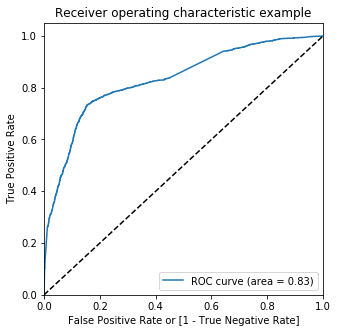

In [543]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_Prob, drop_intermediate = False )

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

## Finding Optimal Cut-off

In [544]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Lead_Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.156432,4108,1,1,0,0,0,0,0,0,0,0
1,0,0.187028,3126,1,1,0,0,0,0,0,0,0,0
2,1,0.811797,1991,1,1,1,1,1,1,1,1,1,0
3,1,0.718969,6946,1,1,1,1,1,1,1,1,0,0
4,0,0.206027,3577,1,1,1,0,0,0,0,0,0,0


In [545]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383977  1.000000  0.000000
0.1   0.1  0.467689  0.990220  0.141986
0.2   0.2  0.683931  0.828036  0.594107
0.3   0.3  0.786418  0.758761  0.803658
0.4   0.4  0.799875  0.710269  0.855728
0.5   0.5  0.792677  0.645884  0.884176
0.6   0.6  0.770458  0.545232  0.910846
0.7   0.7  0.746988  0.426650  0.946660
0.8   0.8  0.721483  0.315403  0.974600
0.9   0.9  0.707088  0.254686  0.989078


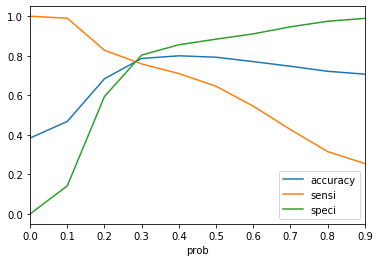

In [546]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [547]:
#Creating predicted Converted using cut off 0.3
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Lead_Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.156432,4108,1,1,0,0,0,0,0,0,0,0,0
1,0,0.187028,3126,1,1,0,0,0,0,0,0,0,0,0
2,1,0.811797,1991,1,1,1,1,1,1,1,1,1,0,1
3,1,0.718969,6946,1,1,1,1,1,1,1,1,0,0,1
4,0,0.206027,3577,1,1,1,0,0,0,0,0,0,0,0


## Precision and Recall

In [548]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)
print(precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))
print(recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))


0.7066413662239089
0.758761206193969


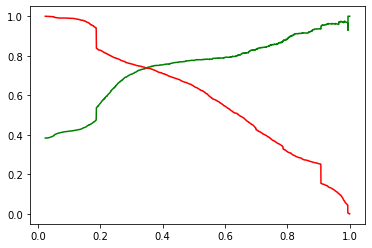

In [549]:
#Precion and recall tradeoff
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")

In [550]:
##### Creating new column 'predicted Lead' with 1 if Convert_Prob > 0.3 else 0
y_train_pred_final['pred_conv'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head(10)

,Converted,Convert_Prob,Lead_Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,pred_conv
0,0,0.156432,4108,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0.187028,3126,1,1,0,0,0,0,0,0,0,0,0,0
2,1,0.811797,1991,1,1,1,1,1,1,1,1,1,0,1,1
3,1,0.718969,6946,1,1,1,1,1,1,1,1,0,0,1,1
4,0,0.206027,3577,1,1,1,0,0,0,0,0,0,0,0,0
5,1,0.907274,1663,1,1,1,1,1,1,1,1,1,1,1,1
6,0,0.187028,1225,1,1,0,0,0,0,0,0,0,0,0,0
7,1,0.704848,1423,1,1,1,1,1,1,1,1,0,0,1,1
8,0,0.070576,7185,1,0,0,0,0,0,0,0,0,0,0,0
9,0,0.163155,5618,1,1,0,0,0,0,0,0,0,0,0,0


## Confusion Matrix

In [551]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.pred_conv )
print(confusion)

[[3164  773]
 [ 592 1862]]


In [552]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: \t\t\t{0:.2f}'.format( TP / float(TP+FN)))
# Let us calculate specificity
print('Specificity: \t\t\t{0:.2f}'.format(TN / float(TN+FP)))
# Calculate false postive rate - predicting  when convertion rate is fina;
print('False Positive Rate: \t\t{0:.2f}'.format( FP/ float(TN+FP)))
# positive predictive value 
print ('Positive Predictive Value: \t{0:.2f}'.format(TP / float(TP+FP)))
# Negative predictive value
print ('Negative Predictive Value: \t{0:.2f}'.format(TN / float(TN+ FN)))
#Precision Score
print('Precision Score:\t\t{0:.2f}'.format(precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)))
#Recall score
print('Recall Score:\t\t\t{0:.2f}'.format(recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)))


Sensitivity: 			0.76
Specificity: 			0.80
False Positive Rate: 		0.20
Positive Predictive Value: 	0.71
Negative Predictive Value: 	0.84
Precision Score:		0.71
Recall Score:			0.76


In [553]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.pred_conv))


0.7864184008762322


## Prediction on X test

In [554]:
X_test1 = X_test[col]
X_test1.head()


,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_SMS Sent
4112,0,-0.876425,0,1,0,0,0,0,1
3642,0,1.845729,0,0,0,0,0,1,0
4577,0,1.004168,0,0,0,0,0,0,1
7073,0,-0.618051,0,0,0,0,0,1,0
2940,0,1.579973,0,0,0,0,0,1,1


In [555]:
#Adding constant and predicting
X_test_sm = sm.add_constant(X_test1)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
4112,0.957575
3642,0.668358
4577,0.982059
7073,0.116434
2940,0.872245


In [556]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting CustID to index
y_test_df['Lead_Number'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [557]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Lead_Number,0
0,1,4112,0.957575
1,1,3642,0.668358
2,1,4577,0.982059
3,0,7073,0.116434
4,1,2940,0.872245


In [558]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Lead_Number','Converted','Convert_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead_Number,Converted,Convert_Prob
0,4112,1,0.957575
1,3642,1,0.668358
2,4577,1,0.982059
3,7073,0,0.116434
4,2940,1,0.872245


In [559]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.30 else 0)
y_pred_final.head()
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8017524644030668

# Model 3

In [560]:
#trying with combination of RFE upto 6 variables
col3=['Do Not Email','What is your current occupation_Student','Last Activity_Converted to Lead',
      'Total Time Spent on Website','Specialization_Others','Last Activity_Email Bounced',
       'Specialization_IT Projects Management','Last Activity_Page Visited on Website',
      'Last Activity_Email Link Clicked','What is your current occupation_Unemployed'
      ]

In [561]:
#fitting
X_train_sm = sm.add_constant(X_train[col3])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res3 = logm2.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6391
Model:                            GLM   Df Residuals:                     6380
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3398.6
Date:                Mon, 02 Mar 2020   Deviance:                       6797.2
Time:                        20:23:34   Pearson chi2:                 6.49e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          2.5271      0.162     15.567      0.000       2.209       2.845
Do Not Email                                  -0.7487      0.153     -4.894      0.000      -1.049      -0.449
What is your current occupation_Student       -2.8156      0.262    -10.751      0.000      -3.329      -2.302
Last Activity_Converted to Lead               -1.8359      0.201     -9.145      0.000      -2.229      -1.442
Total Time Spent on Website                    0.7848      0.032     24.805      0.000       0.723       0.847
Specialization_Others                         -0.0267      0.066     -0.405      0.685      -0.156       0.102
Last Activity_Email Bounced                   -1.4161      0.280     -5.054      0.000      -1.965      -0.867
Specialization_IT Projects Management         -0.1315      0.156     -0.841      0.400      -0.438       0.175
Last Activity_Page Visited on Website         -0.9287      0.130     -7.150      0.000      -1.183      -0.674
Last Activity_Email Link Clicked              -0.4420      0.187     -2.359      0.018      -0.809      -0.075
What is your current occupation_Unemployed    -2.9981      0.166    -18.075      0.000      -3.323      -2.673
==============================================================================================================
"""

In [562]:
col3.remove('Specialization_Others')

In [563]:
X_train_sm = sm.add_constant(X_train[col3])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res3 = logm2.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6391
Model:                            GLM   Df Residuals:                     6381
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3398.7
Date:                Mon, 02 Mar 2020   Deviance:                       6797.4
Time:                        20:23:34   Pearson chi2:                 6.49e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          2.5260      0.162     15.562      0.000       2.208       2.844
Do Not Email                                  -0.7465      0.153     -4.882      0.000      -1.046      -0.447
What is your current occupation_Student       -2.8242      0.261    -10.821      0.000      -3.336      -2.313
Last Activity_Converted to Lead               -1.8371      0.201     -9.148      0.000      -2.231      -1.443
Total Time Spent on Website                    0.7884      0.030     25.969      0.000       0.729       0.848
Last Activity_Email Bounced                   -1.4189      0.280     -5.064      0.000      -1.968      -0.870
Specialization_IT Projects Management         -0.1223      0.155     -0.790      0.429      -0.426       0.181
Last Activity_Page Visited on Website         -0.9266      0.130     -7.136      0.000      -1.181      -0.672
Last Activity_Email Link Clicked              -0.4426      0.187     -2.362      0.018      -0.810      -0.075
What is your current occupation_Unemployed    -3.0076      0.164    -18.313      0.000      -3.329      -2.686
==============================================================================================================
"""

In [564]:
col3.remove('Specialization_IT Projects Management')

In [565]:
X_train_sm = sm.add_constant(X_train[col3])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res3 = logm2.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6391
Model:                            GLM   Df Residuals:                     6382
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3399.0
Date:                Mon, 02 Mar 2020   Deviance:                       6798.0
Time:                        20:23:35   Pearson chi2:                 6.49e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          2.5217      0.162     15.542      0.000       2.204       2.840
Do Not Email                                  -0.7475      0.153     -4.889      0.000      -1.047      -0.448
What is your current occupation_Student       -2.8233      0.261    -10.818      0.000      -3.335      -2.312
Last Activity_Converted to Lead               -1.8362      0.201     -9.141      0.000      -2.230      -1.443
Total Time Spent on Website                    0.7876      0.030     25.961      0.000       0.728       0.847
Last Activity_Email Bounced                   -1.4230      0.280     -5.083      0.000      -1.972      -0.874
Last Activity_Page Visited on Website         -0.9257      0.130     -7.133      0.000      -1.180      -0.671
Last Activity_Email Link Clicked              -0.4385      0.187     -2.341      0.019      -0.805      -0.071
What is your current occupation_Unemployed    -3.0081      0.164    -18.312      0.000      -3.330      -2.686
==============================================================================================================
"""

##  VIF

In [566]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Do Not Email,1.83
4,Last Activity_Email Bounced,1.73
7,What is your current occupation_Unemployed,1.25
5,Last Activity_Page Visited on Website,1.10
2,Last Activity_Converted to Lead,1.06
6,Last Activity_Email Link Clicked,1.04
1,What is your current occupation_Student,1.01
3,Total Time Spent on Website,1.01


In [567]:
# Getting the predicted values on the train set
y_train_pred = res3.predict(X_train_sm)
y_train_pred[:10]


4108    0.239776
3126    0.164650
1991    0.722601
6946    0.678585
3577    0.412134
1663    0.234052
1225    0.234052
1423    0.679213
7185    0.081752
5618    0.234827
dtype: float64

In [568]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.23977622, 0.16465037, 0.72260105, 0.67858514, 0.41213402,
       0.23405232, 0.23405232, 0.67921262, 0.08175216, 0.23482723])

In [569]:
y_train_pred_final3 = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final3['Lead_Number'] = y_train.index
y_train_pred_final3.head()


,Converted,Convert_Prob,Lead_Number
0,0,0.239776,4108
1,0,0.164650,3126
2,1,0.722601,1991
3,1,0.678585,6946
4,0,0.412134,3577


## ROC Curve

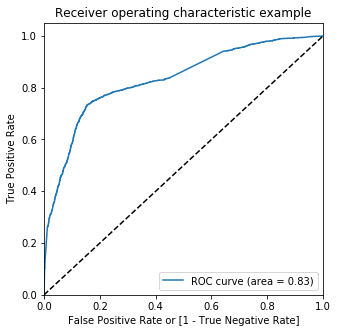

In [570]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_Prob, drop_intermediate = False )

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

In [571]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Lead_Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,pred_conv
0,0,0.156432,4108,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0.187028,3126,1,1,0,0,0,0,0,0,0,0,0,0
2,1,0.811797,1991,1,1,1,1,1,1,1,1,1,0,1,1
3,1,0.718969,6946,1,1,1,1,1,1,1,1,0,0,1,1
4,0,0.206027,3577,1,1,1,0,0,0,0,0,0,0,0,0


In [572]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383977  1.000000  0.000000
0.1   0.1  0.467689  0.990220  0.141986
0.2   0.2  0.683931  0.828036  0.594107
0.3   0.3  0.786418  0.758761  0.803658
0.4   0.4  0.799875  0.710269  0.855728
0.5   0.5  0.792677  0.645884  0.884176
0.6   0.6  0.770458  0.545232  0.910846
0.7   0.7  0.746988  0.426650  0.946660
0.8   0.8  0.721483  0.315403  0.974600
0.9   0.9  0.707088  0.254686  0.989078


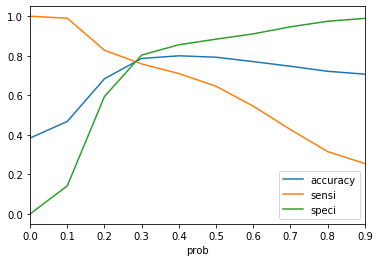

In [573]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [574]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Lead_Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,pred_conv
0,0,0.156432,4108,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0.187028,3126,1,1,0,0,0,0,0,0,0,0,0,0
2,1,0.811797,1991,1,1,1,1,1,1,1,1,1,0,1,1
3,1,0.718969,6946,1,1,1,1,1,1,1,1,0,0,1,1
4,0,0.206027,3577,1,1,1,0,0,0,0,0,0,0,0,0


In [575]:
#Precion and Recall
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.758761206193969

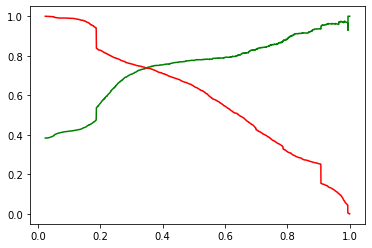

In [576]:
#Precion and recall tradeoff
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")

In [577]:
##### Creating new column 'predicted Lead' with 1 if Convert_Prob > 0.3 else 0
y_train_pred_final['pred_conv'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head(10)

,Converted,Convert_Prob,Lead_Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,pred_conv
0,0,0.156432,4108,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0.187028,3126,1,1,0,0,0,0,0,0,0,0,0,0
2,1,0.811797,1991,1,1,1,1,1,1,1,1,1,0,1,1
3,1,0.718969,6946,1,1,1,1,1,1,1,1,0,0,1,1
4,0,0.206027,3577,1,1,1,0,0,0,0,0,0,0,0,0
5,1,0.907274,1663,1,1,1,1,1,1,1,1,1,1,1,1
6,0,0.187028,1225,1,1,0,0,0,0,0,0,0,0,0,0
7,1,0.704848,1423,1,1,1,1,1,1,1,1,0,0,1,1
8,0,0.070576,7185,1,0,0,0,0,0,0,0,0,0,0,0
9,0,0.163155,5618,1,1,0,0,0,0,0,0,0,0,0,0


In [578]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.pred_conv )
print(confusion)


[[3164  773]
 [ 592 1862]]


In [579]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: \t\t\t{0:.2f}'.format( TP / float(TP+FN)))
# Let us calculate specificity
print('Specificity: \t\t\t{0:.2f}'.format(TN / float(TN+FP)))
# Calculate false postive rate - predicting  when convertion rate is fina;
print('False Positive Rate: \t\t{0:.2f}'.format( FP/ float(TN+FP)))
# positive predictive value 
print ('Positive Predictive Value: \t{0:.2f}'.format(TP / float(TP+FP)))
# Negative predictive value
print ('Negative Predictive Value: \t{0:.2f}'.format(TN / float(TN+ FN)))
#Precision Score
print('Precision Score:\t\t{0:.2f}'.format(precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)))
#Recall score
print('Recall Score:\t\t\t{0:.2f}'.format(recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)))



Sensitivity: 			0.76
Specificity: 			0.80
False Positive Rate: 		0.20
Positive Predictive Value: 	0.71
Negative Predictive Value: 	0.84
Precision Score:		0.71
Recall Score:			0.76


In [580]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.pred_conv))

0.7864184008762322


## Prediction on test set

In [581]:
X_test1 = X_test[col]
X_test1.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_SMS Sent
4112,0,-0.876425,0,1,0,0,0,0,1
3642,0,1.845729,0,0,0,0,0,1,0
4577,0,1.004168,0,0,0,0,0,0,1
7073,0,-0.618051,0,0,0,0,0,1,0
2940,0,1.579973,0,0,0,0,0,1,1


In [582]:
#adding constant
X_test_sm = sm.add_constant(X_test1)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()


,0
4112,0.957575
3642,0.668358
4577,0.982059
7073,0.116434
2940,0.872245


In [583]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting CustID to index
y_test_df['Lead_Number'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


In [584]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()


,Converted,Lead_Number,0
0,1,4112,0.957575
1,1,3642,0.668358
2,1,4577,0.982059
3,0,7073,0.116434
4,1,2940,0.872245


In [585]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Lead_Number','Converted','Convert_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead_Number,Converted,Convert_Prob
0,4112,1,0.957575
1,3642,1,0.668358
2,4577,1,0.982059
3,7073,0,0.116434
4,2940,1,0.872245


In [586]:
#Genrating predicted conversion
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.30 else 0)
y_pred_final.head()

,Lead_Number,Converted,Convert_Prob,final_predicted
0,4112,1,0.957575,1
1,3642,1,0.668358,1
2,4577,1,0.982059,1
3,7073,0,0.116434,0
4,2940,1,0.872245,1


In [587]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8017524644030668

Conclude that model 1 is better due to
- Difference between accuracy of traina nd test being minimal(<2%)
- The accuracy is above 80% for both

# Generate score

In [588]:
#Preparing all rows for predicting score
X_scaled=ld_scr_mod.copy()
X_scaled.head()
y_test=ld_scr['Lead Number']
X_scaled.shape

(9130, 42)

In [589]:
#scaling and transforming
X_scaled[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_scaled[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [590]:
X_test1=X_scaled[col]
X_test_sm = sm.add_constant(X_test1)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

0    0.244990
1    0.278070
2    0.736141
3    0.154117
4    0.370395
5    0.074776
6    0.732182
7    0.074776
8    0.101799
9    0.099412
dtype: float64

In [591]:
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
0,0.244990
1,0.278070
2,0.736141
3,0.154117
4,0.370395


In [592]:
# # Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df['Lead Number'], y_pred_1],axis=1)
#y_pred_final.drop('Lead_Number',axis=1,inplace=True)
y_pred_final.head()

,Lead Number,0
0,660737,0.244990
1,660728,0.278070
2,660727,0.736141
3,660719,0.154117
4,660681,0.370395


In [593]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})
# Round the Convert_Prob column
y_pred_final['Score']=round(100*y_pred_final['Convert_Prob'],2)
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Convert_Prob,Score
0,660737,0.244990,24.50
1,660728,0.278070,27.81
2,660727,0.736141,73.61
3,660719,0.154117,15.41
4,660681,0.370395,37.04


In [594]:
y_pred_final.query('Score>=40').count()/len(y_pred_final)*100

Lead Number     39.693319
Convert_Prob    39.693319
Score           39.693319
dtype: float64

- Impiles that about 40% of the population has converted positive

In [595]:
y_pred_final.describe()

,Convert_Prob,Score
count,9130.000000,9130.000000
mean,0.384553,38.455509
std,0.317271,31.726916
min,0.005905,0.590000
25%,0.108281,10.830000
50%,0.244990,24.500000
75%,0.635843,63.580000
max,0.999624,99.960000


In [596]:
y_pred_final[y_pred_final['Score']>=40].sort_values('Score',ascending=False)

,Lead Number,Convert_Prob,Score
818,651812,0.999558,99.96
8074,588037,0.999624,99.96
8063,588075,0.999079,99.91
4613,615524,0.998952,99.90
7187,594369,0.998409,99.84
7211,594089,0.998225,99.82
2011,640191,0.998088,99.81
5671,606508,0.998021,99.80
1559,643938,0.998004,99.80
936,650338,0.998025,99.80


In [597]:
df=ld_scr_mod[col]
df['Lead Number']=pd.Series(Lead_Number)
#pd.concat(ld_scr_mod,pd.Series(Lead_Number))

ld_concat=pd.merge(df,y_pred_final)

In [598]:
#Analyzing only converted
ld_concat=ld_concat[ld_concat['Score']>=40].sort_values(by='Score',ascending=False)
ld_concat.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_SMS Sent,Lead Number,Convert_Prob,Score
786,0,1570,1,0,0,0,0,0,0,651812,0.999558,99.96
7970,0,1650,1,0,0,0,0,0,0,588037,0.999624,99.96
7960,0,1208,1,0,0,0,0,0,0,588075,0.999079,99.91
4541,0,1144,1,0,0,0,0,0,0,615524,0.998952,99.90
7088,0,938,1,0,0,0,0,0,0,594369,0.998409,99.84


In [627]:
DoNotEmail1=ld_concat[ld_concat['Do Not Email']==1]
#DoNotEmail1.head()
#sns.heatmap(DoNotEmail1.corr())
DoNotEmail1[DoNotEmail1['Score']>90].describe(percentiles=[0.5,0.8,0.85,0.9,0.95,0.99])

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_SMS Sent,Convert_Prob,Score
count,16.0,16.000000,16.000000,16.0,16.0,16.0,16.0,16.000000,16.000000,16.000000,16.000000
mean,1.0,1097.187500,0.562500,0.0,0.0,0.0,0.0,0.312500,0.437500,0.953191,95.318125
std,0.0,703.125235,0.512348,0.0,0.0,0.0,0.0,0.478714,0.512348,0.030858,3.085470
min,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.901205,90.120000
50%,1.0,1337.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.956480,95.645000
80%,1.0,1674.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,0.986510,98.650000
85%,1.0,1677.750000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,0.988904,98.890000
90%,1.0,1718.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,0.989702,98.970000
95%,1.0,1805.750000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,0.989702,98.970000
99%,1.0,1922.750000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,0.989702,98.970000


#### For those who have opted, do not email ‘Yes’, for score above 90, 
-	Lead Source is not Olark Chat, 
-	Last Activity is not Converted to Lead or olark Chat Conversation, 
-	current occupation is not studen or unemployed, 
-	Total Time spent of website is more than 1097. 
-	Lead Origin Lead Add Form

In [630]:
DoNotEmail0=ld_concat[ld_concat['Do Not Email']==0]
#DoNotEmail1.head()
#sns.heatmap(DoNotEmail1.corr())
DoNotEmail0[DoNotEmail0['Score']>90].describe(percentiles=[0.5,0.8,0.85,0.9,0.95,0.99])

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_SMS Sent,Convert_Prob,Score
count,901.0,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000
mean,0.0,848.471698,0.407325,0.048835,0.001110,0.003330,0.008879,0.432852,0.685905,0.962472,96.247703
std,0.0,720.753773,0.491609,0.215642,0.033315,0.057639,0.093861,0.495746,0.464412,0.028633,2.863650
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.900436,90.040000
50%,0.0,1032.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.965579,96.560000
80%,0.0,1569.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.989426,98.940000
85%,0.0,1622.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.993002,99.300000
90%,0.0,1700.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.997655,99.770000
95%,0.0,1826.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.997655,99.770000
99%,0.0,2094.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.998004,99.800000


#### For those who have opted do not email ‘No’, for score above 90
-	Lead Source is not Olark Chat, 
-	Last Activity is not Converted to Lead or olark Chat Conversation, 
-	current occupation is not student or unemployed 
-	Total Time spent of website is more than 848. 
-	Lead Origin Lead Add Form

In [ ]:
DoNotEmail1=ld_concat[ld_concat['Do Not Email']==1]
#DoNotEmail1.head()
#sns.heatmap(DoNotEmail1.corr())
DoNotEmail1[DoNotEmail1['Score']>90].describe(percentiles=[0.5,0.8,0.85,0.9,0.95,0.99])

In [418]:
ld_concat.describe()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_SMS Sent,Convert_Prob,Score
count,3624.000000,3624.000000,3624.000000,3624.000000,3624.000000,3624.000000,3624.000000,3624.000000,3624.000000,3624.000000,3624.000000
mean,0.026214,863.586921,0.174117,0.096302,0.009934,0.010762,0.019040,0.784492,0.499172,0.735618,73.561769
std,0.159794,618.930226,0.379262,0.295046,0.099186,0.103193,0.136683,0.411231,0.500068,0.187397,18.739790
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400023,40.000000
25%,0.000000,208.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.583768,58.380000
50%,0.000000,1036.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.756762,75.680000
75%,0.000000,1357.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.901658,90.170000
max,1.000000,2272.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999624,99.960000


In [419]:
ld_concat[ld_concat['Score']>=90].describe()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_SMS Sent,Convert_Prob,Score
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,0.017448,852.811341,0.410033,0.047983,0.001091,0.003272,0.008724,0.430752,0.681570,0.962310,96.231483
std,0.131006,720.811694,0.492108,0.213846,0.033023,0.057135,0.093045,0.495452,0.466121,0.028681,2.868446
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.900436,90.040000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.941712,94.170000
50%,0.000000,1042.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.965579,96.560000
75%,0.000000,1521.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.989426,98.940000
max,1.000000,2272.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999624,99.960000


In [420]:
ld_concat[ld_concat['Score']<=50].describe()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_SMS Sent,Convert_Prob,Score
count,535.000000,535.000000,535.0,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000
mean,0.033645,747.336449,0.0,0.016822,0.022430,0.011215,0.013084,0.981308,0.424299,0.446716,44.671402
std,0.180482,420.544866,0.0,0.128726,0.148216,0.105404,0.113741,0.135560,0.494699,0.029289,2.929139
min,0.000000,153.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400023,40.000000
25%,0.000000,302.500000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.421265,42.125000
50%,0.000000,969.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.445809,44.580000
75%,0.000000,1060.500000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.470712,47.070000
max,1.000000,1866.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.499864,49.990000


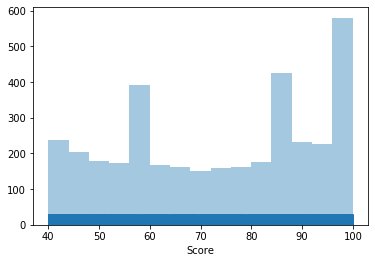

In [421]:
#distribution of score,
sns.distplot(ld_concat['Score'],rug=True,kde=False)

- Note that Peaks between 95-100, 85-90, 55-60

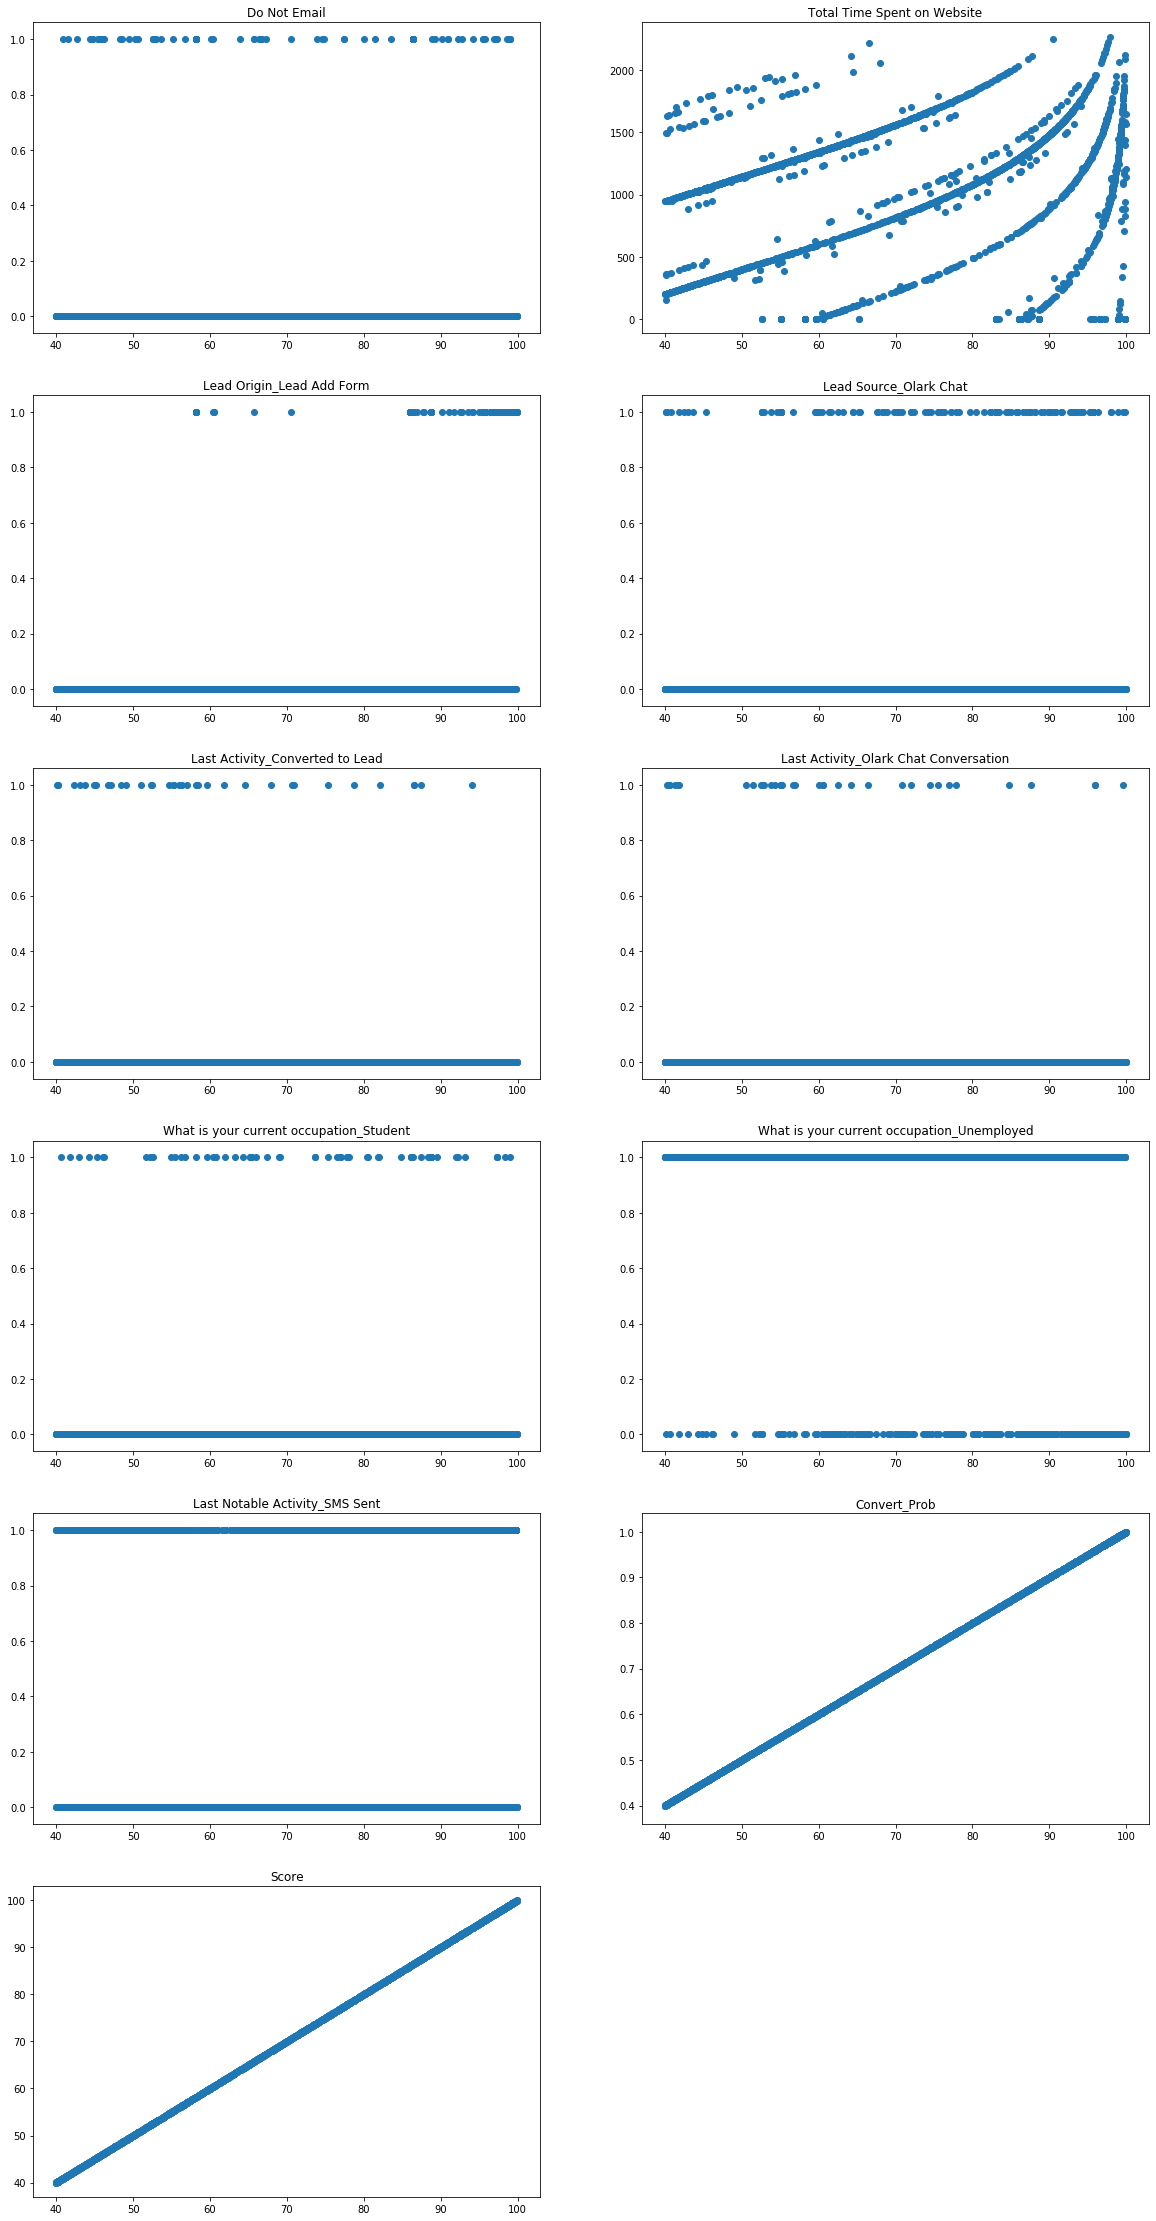

In [422]:
#Analyzing distribution w.r.t Score column
plt.figure(figsize=(20,40))
j=0
for i in ld_concat.columns:
    if (i!='Lead Number'):
        plt.subplot(len(ld_concat.columns)//2,2,j+1)
        plt.scatter(y=i,x='Score',data=ld_concat)
        plt.title(i)
        j=j+1

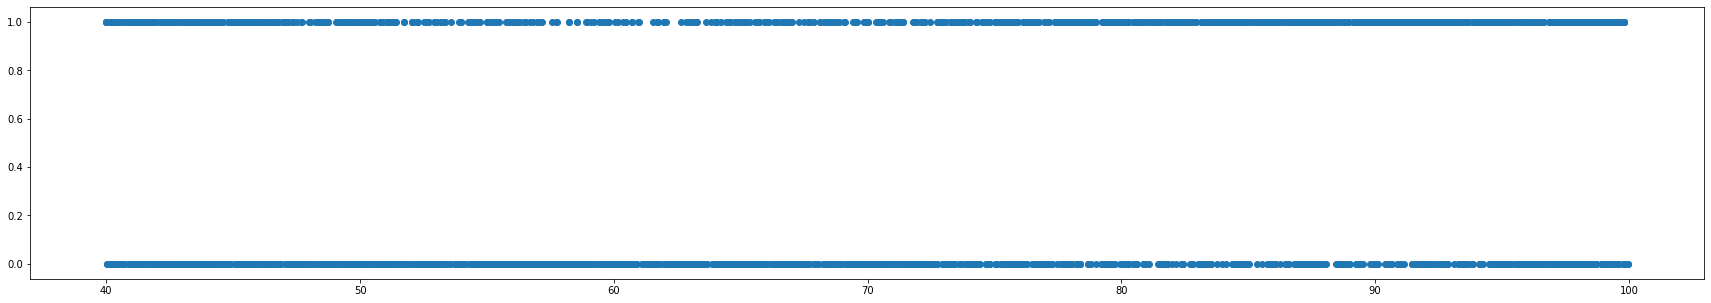

In [423]:
plt.figure(figsize=(30,5))
plt.scatter(y='Last Notable Activity_SMS Sent',x='Score',data=ld_concat)

#### Conclude that
- Do not email 'No' is favouable for higher score
- total  time Spent on website is more for higher score
- if lead_origin has add form, it is highly favourable for higher score
- if Lead source is Olark Chat it is highly favourable
- if Last Activity is Converted to lead, it is least favourable for higher score
- if Last Activity Olark Chat Conversation is least favouraed for higher score
- if current occupation is student,  it is less desirable for higher core
- if occupation is unemployed, more favourable for higher score
- if Last Notable Activity is SMS Sent,it is favourable for higher score




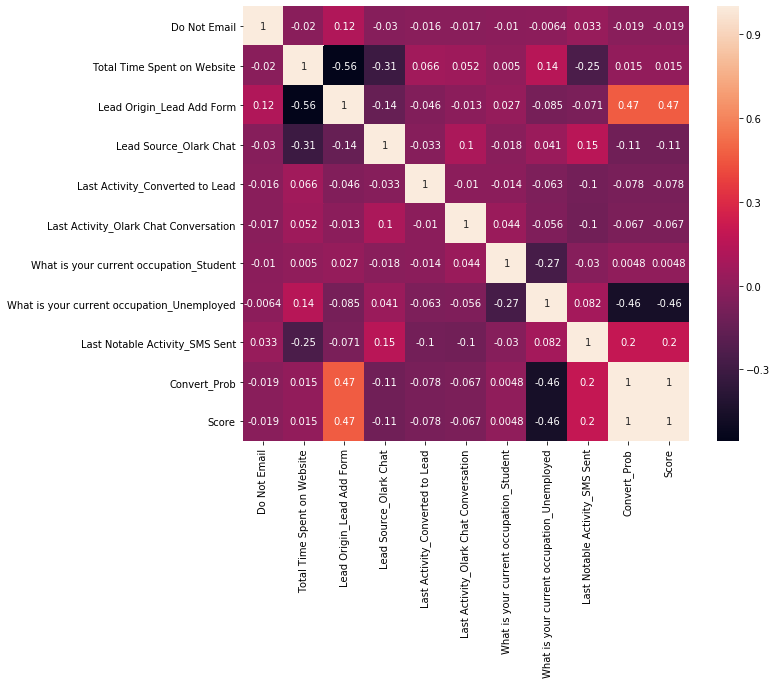

In [424]:
plt.figure(figsize=(10,8))
sns.heatmap(ld_concat.corr(),annot=True)

#### Note:

- Top 3 desirable variables
    - Total time spent on website
    - Lead Origin is Lead Add From
    - Last Notable Activity is SMS Sent
- Top 3 not desirable variables
    - Current occupation is unemployed
    - Last activity is Olark chat Conversation
    - Do Not Email is 'Yes'


In [425]:
# plt.figure(figsize=(200,200))
# sns.pairplot(data=ld_concat)
# plt.savefig('pairplot.png',bbox_inch='tight')

In [426]:
#Concatenate with original  data  without dummies
c=['Do Not Email','Total Time Spent on Website','Lead Origin','Lead Source',
   'Last Activity',
   'What is your current occupation',
   'Last Notable Activity','Lead Number']
ld_concat=pd.merge(ld_scr[c],y_pred_final)

In [427]:
#only converted values
ld_concat=ld_concat[ld_concat['Score']>=40].sort_values(by='Score',ascending=False)

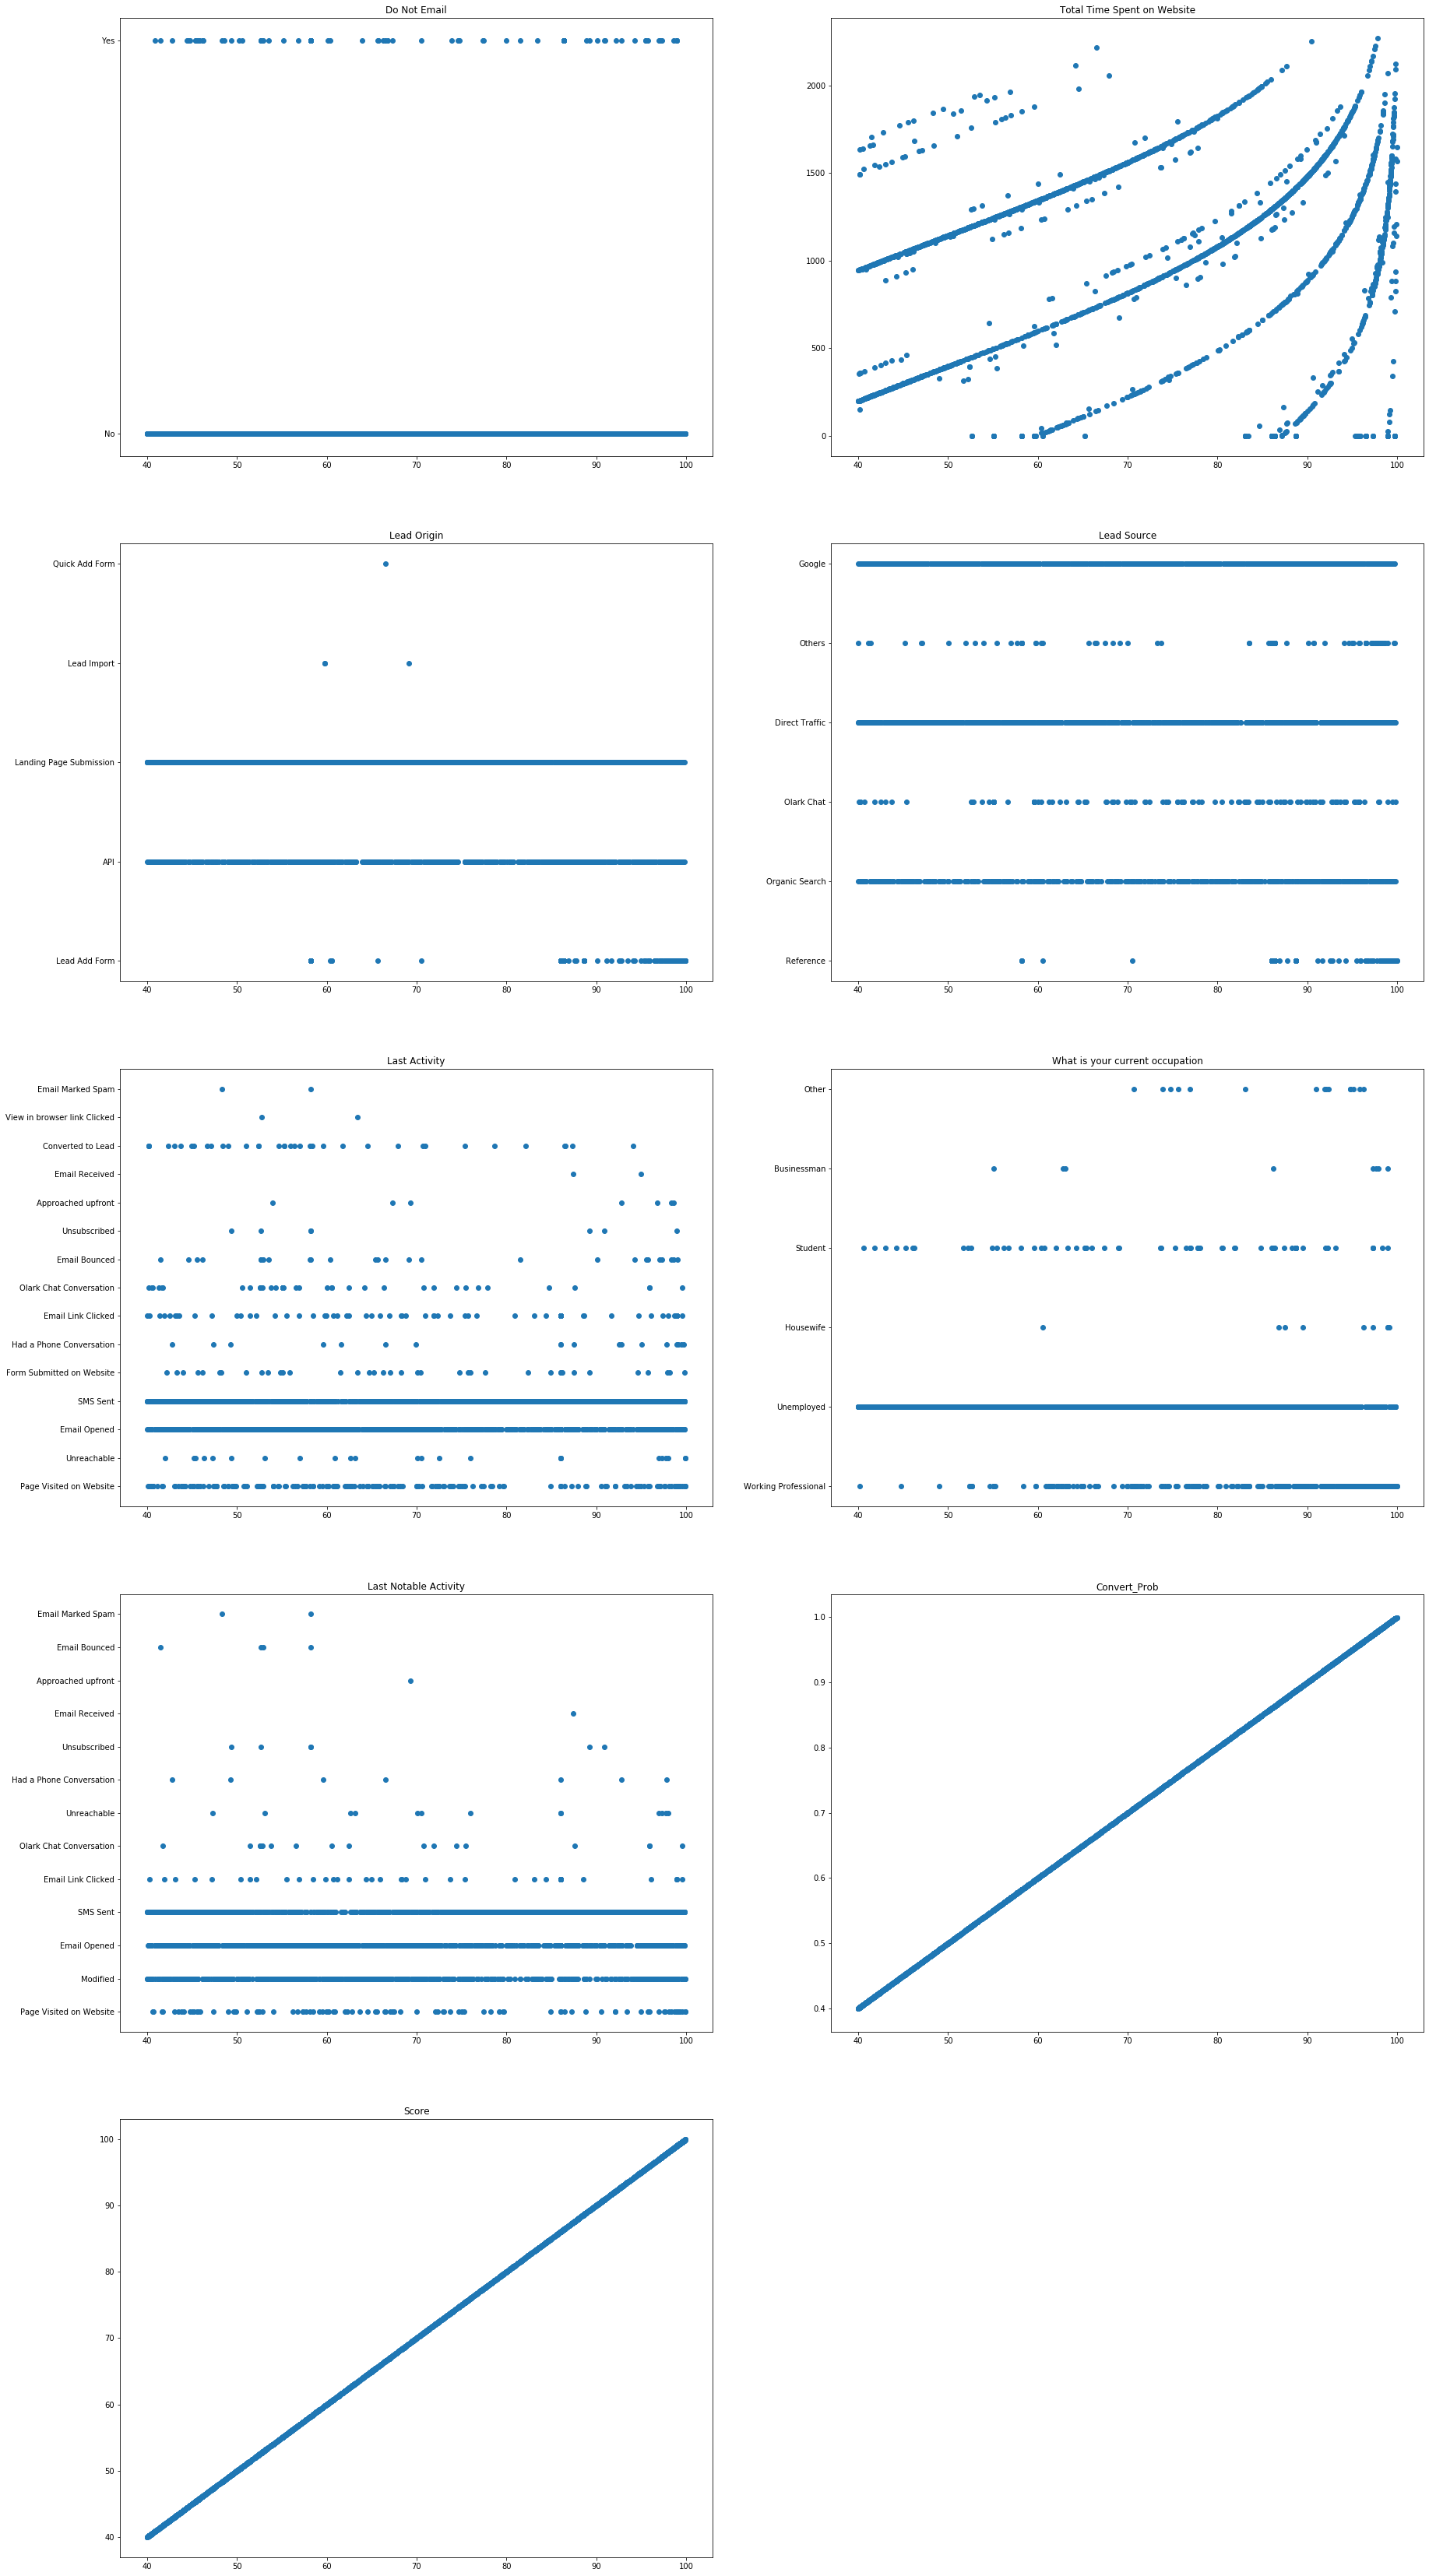

In [428]:
#Analyzing distribution w.r.t Score column
plt.figure(figsize=(30,60))
j=0
for i in ld_concat.columns:
    if (i!='Lead Number'):
        plt.subplot(len(ld_concat.columns)//2,2,j+1)
        plt.scatter(y=i,x='Score',data=ld_concat)
        plt.title(i)
        j=j+1

#### Observe that for higher score
- Total time spent on website between 1000-2000 is more favourable
- Do not email 'Yes' is less favourable
- Olark Chat, Reference and Others is more for Lead Source
- For last activity if Page visited on website is less,Email options is less,Email Link clicked is less, Converted to Lead less,Olark chat conversation is less, unreachable less
- Current occupation  is housewife or working professional and not student or unemployed



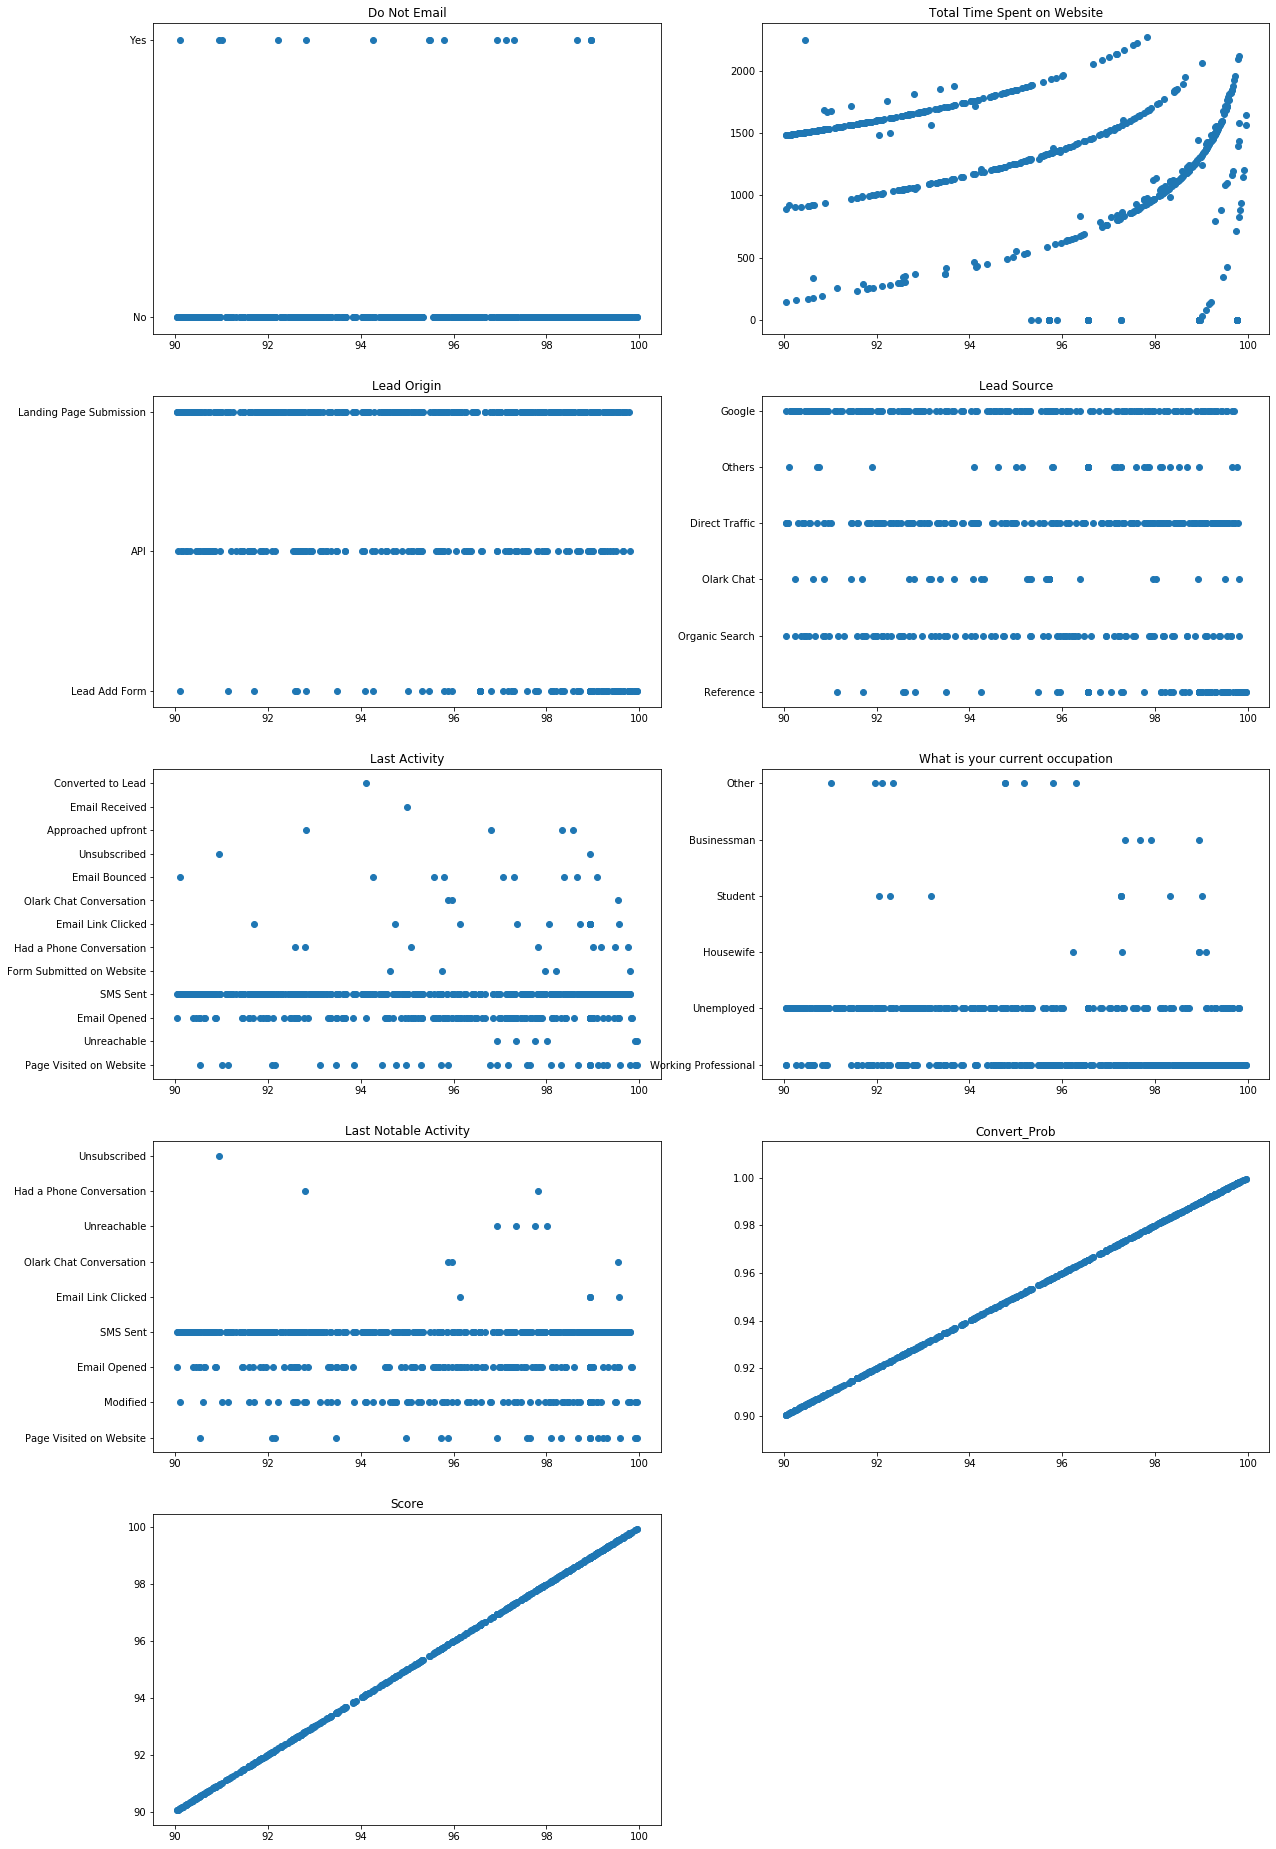

In [429]:
#Analyzing distribution w.r.t Score column  for Score>=90
plt.figure(figsize=(20,40))
j=0
for i in ld_concat.columns:
    if (i!='Lead Number'):
        plt.subplot(len(ld_concat.columns)//2+1,2,j+1)
        plt.scatter(y=i,x='Score',data=ld_concat[ld_concat['Score']>=90])
        plt.title(i)
        j=j+1

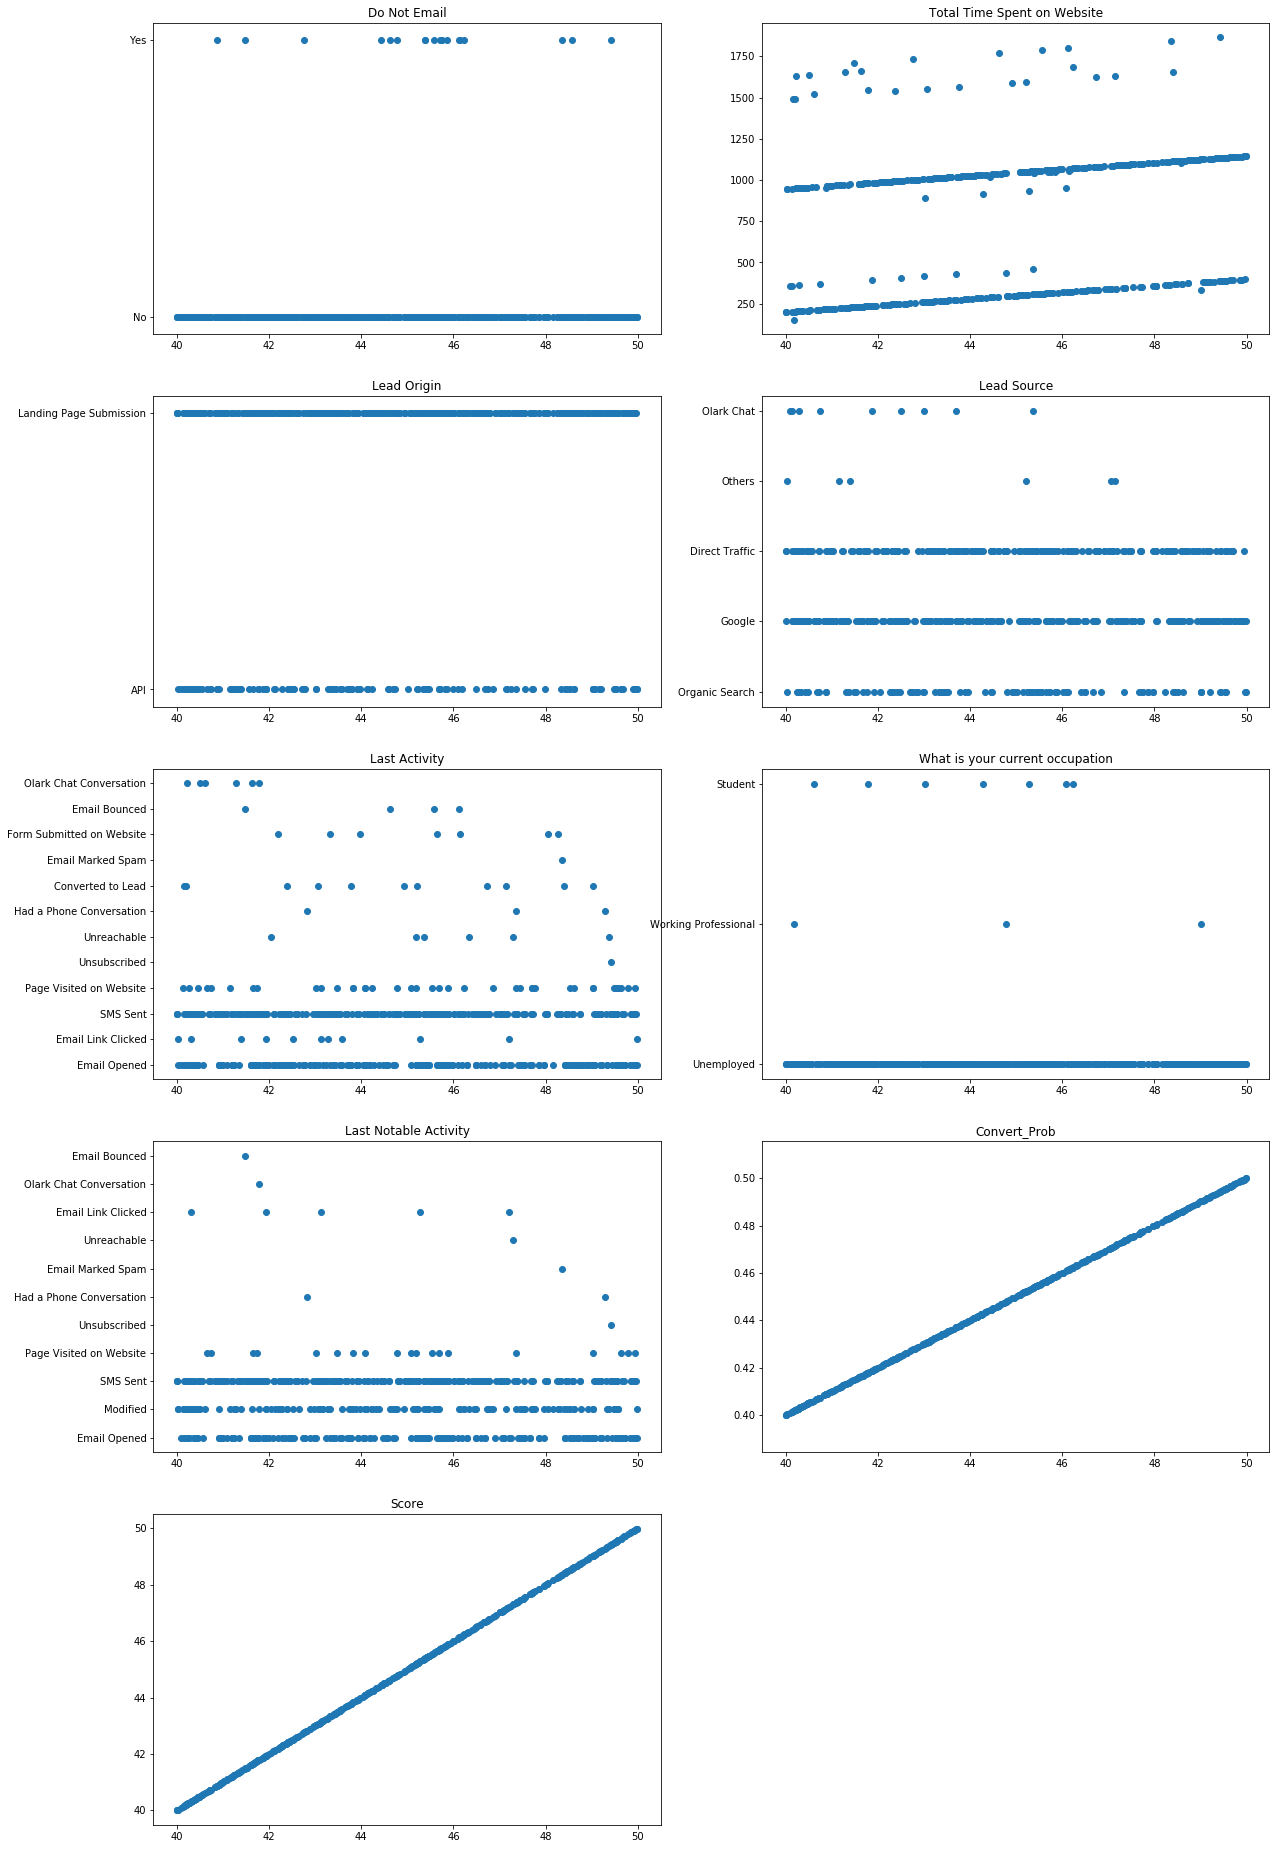

In [430]:
#Analyzing distribution w.r.t Score column  for Score<=50
plt.figure(figsize=(20,40))
j=0
for i in ld_concat.columns:
    if (i!='Lead Number'):
        plt.subplot(len(ld_concat.columns)//2+1,2,j+1)
        plt.scatter(y=i,x='Score',data=ld_concat[ld_concat['Score']<=50])
        plt.title(i)
        j=j+1

In [431]:
#Concatenate with original  data  with dummies

ld_concat=pd.merge(ld_scr_mod_orig,y_pred_final)

#plt.figure(figsize=(20,20))
#sns.heatmap(ld_concat.corr())
df=pd.DataFrame(ld_concat.corrwith(ld_concat['Score']))
df.reset_index(inplace=True)
#df.sort_values()

Text(0.5, 1.0, 'Positive Correlation with Score')

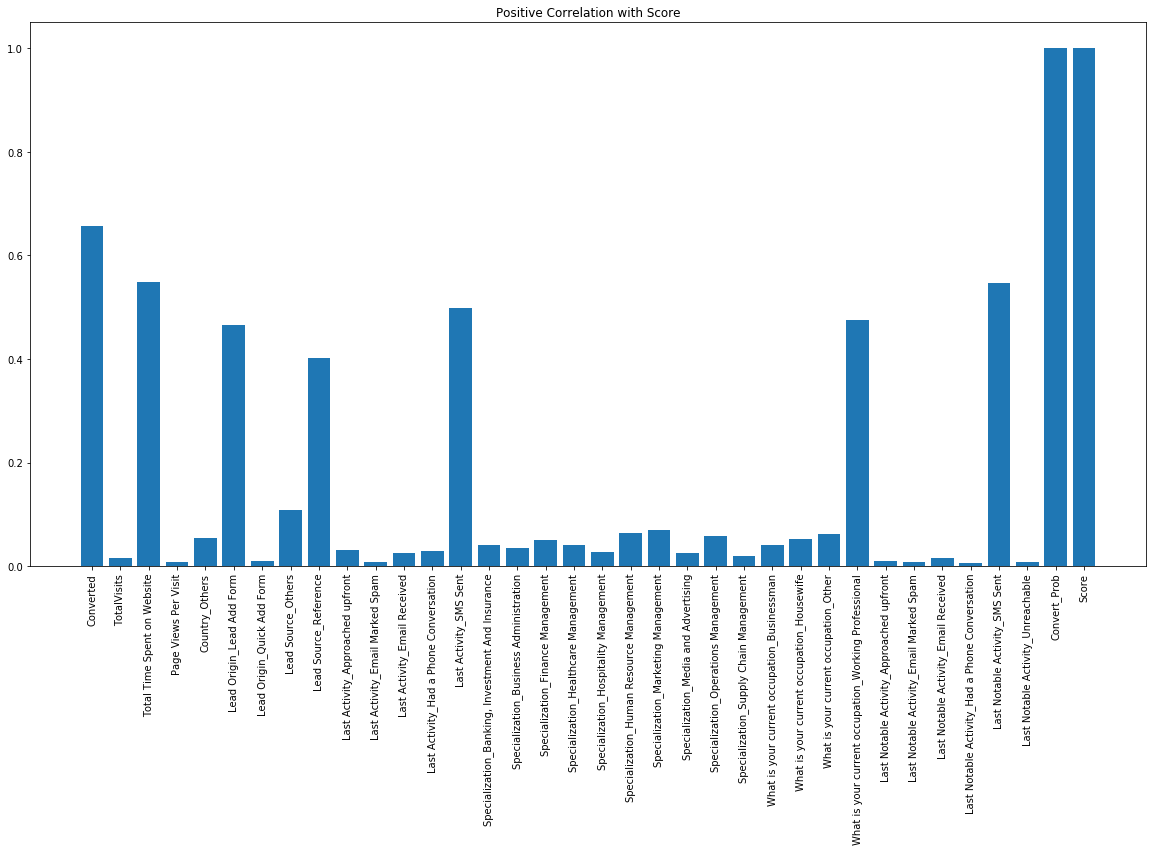

In [432]:
#Positive correlation
plt.figure(figsize=(20,10))
plt.bar(x=df[df[0]>0]['index'],height=df[df[0]>0][0])
plt.xticks(rotation=90)
plt.title('Positive Correlation with Score')

#### We notice that Score has Strong positive correlation with
- Total  time spent on website
- Lead Origin is Lead Add Form
- Lead Score is Reference
- Last Activity is SMS Sent
- Current Occupation is Working Professional
- Last notable Activity is SMS sent

(0, -0.5)

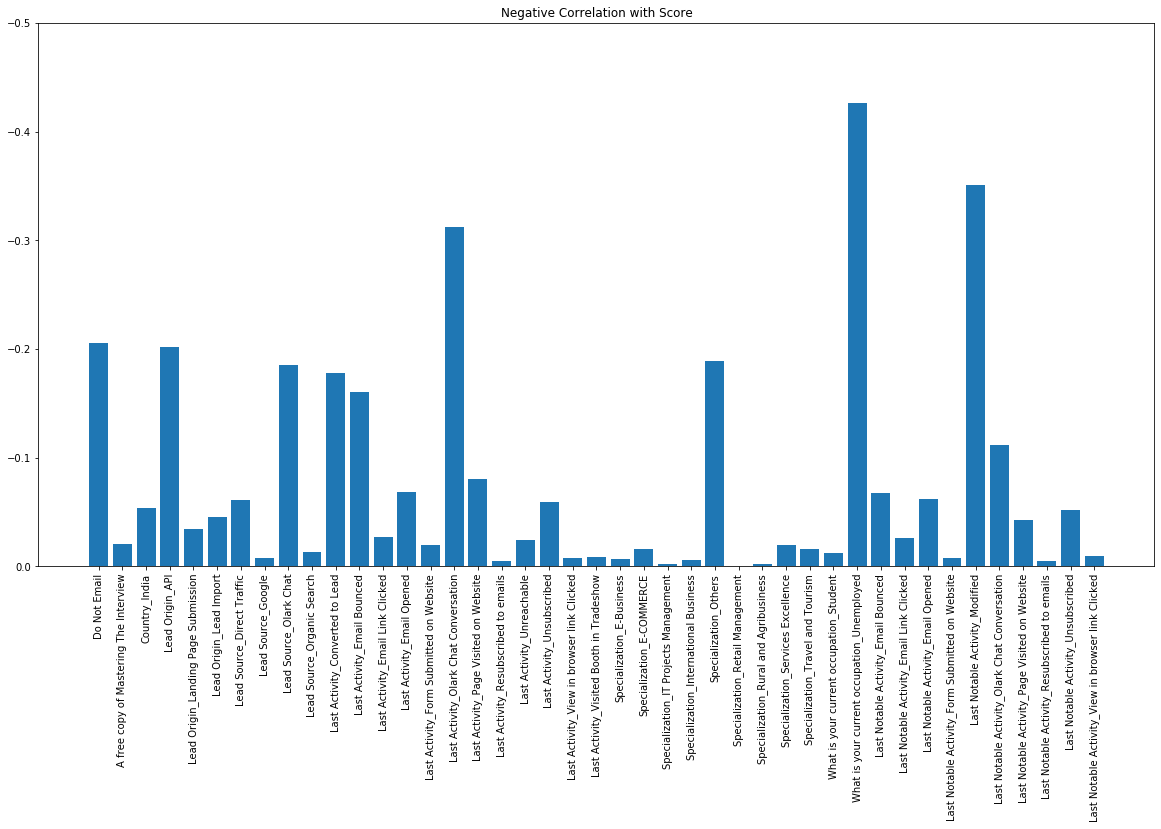

In [433]:
#Negative correlation
plt.figure(figsize=(20,10))
plt.bar(x=df[df[0]<0]['index'],height=df[df[0]<0][0])
plt.xticks(rotation=90)
plt.title('Negative Correlation with Score')
plt.ylim(0,-0.5)

#### We notice that score has a strong negative correlation with
- Do not email 'Yes'
- Lead Origin is API
- Lead Source is Olark chat
- Last Activity is Converted to Lead
- Last Activity is Email bounced
- Last Activity is Olark Chat Converation
- Specialization Others
- current Occupation is unemployed
- Last notable Activity is Modified




In [434]:
#Poorly correlated
df1=list(df[df[0]<0.05] ['index'])
df2=list(df[df[0]>-0.05] ['index'])
common=[]
for  i in df1:
    if i in df2:
        common.append(i)
common

['TotalVisits',
 'Page Views Per Visit',
 'A free copy of Mastering The Interview',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Import',
 'Lead Origin_Quick Add Form',
 'Lead Source_Google',
 'Lead Source_Organic Search',
 'Last Activity_Approached upfront',
 'Last Activity_Email Link Clicked',
 'Last Activity_Email Marked Spam',
 'Last Activity_Email Received',
 'Last Activity_Form Submitted on Website',
 'Last Activity_Had a Phone Conversation',
 'Last Activity_Resubscribed to emails',
 'Last Activity_Unreachable',
 'Last Activity_View in browser link Clicked',
 'Last Activity_Visited Booth in Tradeshow',
 'Specialization_Banking, Investment And Insurance',
 'Specialization_Business Administration',
 'Specialization_E-Business',
 'Specialization_E-COMMERCE',
 'Specialization_Healthcare Management',
 'Specialization_Hospitality Management',
 'Specialization_IT Projects Management',
 'Specialization_International Business',
 'Specialization_Media and Advertising',
 'Spec

## Conclusion
- Model 1 is having better accuracy for Test and train
- 40 is the cut off score for the model
- Coefficient
    - Do Not Email	-1.4876
    - Total Time Spent on Website	1.107
    - Lead Origin_Lead Add Form	4.1411
    - Lead Source_Olark Chat	1.1959
    - Last Activity_Converted to Lead	-1.1061
    - Last Activity_Olark Chat Conversation	-1.39
    - What is your current occupation_Student	-2.4796
    - What is your current occupation_Unemployed	-2.719
    - Last Notable Activity_SMS Sent	1.5144
-  3 Top variables
    - Lead Origin is Lead Add Form
    - current occupation is Student or Unemployed
    - Last Notable Activity_SMS Sent